<a href="https://colab.research.google.com/github/JulioLaz/movie_analysis/blob/main/Movie_Analysis_JAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




##Una plataforma de streaming para el hogar, con presencia en todo el mundo, necesita impulsar su rendimiento utilizando datos de tendencias en el sector de manera estratégica. Como científico de datos especializado en la industria del entretenimiento, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cual es la evolución del rating por tipo de contenido?

2. ¿Cual es el rating promedio por género?

3. ¿Cuáles son los géneros que proporcionan mayor ROI?

4. ¿Cuáles son los países con mayor producción de contenido?

5. ¿Cual es tu recomendación para el cliente?

### **Kaggle:**

1. https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv

2. https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset

3. https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies


#**1. Configuración del Ambiente**


---




In [1]:
# !python -V
# print('------')
# !pip show Pandas | grep 'Name\|Version'
# print('------')
# !pip show Matplotlib | grep 'Name\|Version'

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Python 3.10.12
# ------
# Name: pandas
# Version: 2.0.3
# ------
# Name: matplotlib
# Version: 3.7.1

In [1]:
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import dask.dataframe as dd
from google.colab import drive
drive.mount('/content/drive')
global df_title_basics,df_title_ratings,df_tmdb

Mounted at /content/drive


In [ ]:
path_img = 'https://i0.wp.com/image.tmdb.org/t/p/w300/'
# path_img = 'https://i0.wp.com/image.tmdb.org/t/p/w300/pbrkL804c8yAv3zBZR4QPEafpAR.jpg'

##  Subir de tu cuenta kaggle el archivo kaggle.json
1. Ve a tu perfil de Kaggle y descarga API key (kaggle.json).
2. En Colab, sube el archivo kaggle.json. Puedes hacerlo haciendo clic en el ícono de carpeta a la izquierda, luego en el ícono de subir (archivo con una flecha hacia arriba).

In [114]:
# Subir el archivo kaggle.json desde donde lo guardaste:
from google.colab import files

files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [115]:
### NOMBRE DE LA CARPETA DE KAGGLE:
### ingresar nombre despues de las url https://www.kaggle.com/datasets/.........
!kaggle datasets download -d ashirwadsangwan/imdb-dataset  ### 2Gigabyte
!unzip imdb-dataset.zip

!kaggle datasets download -d rounakbanik/the-movies-dataset  ### 239megabyte
!unzip the-movies-dataset.zip

# https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies
!kaggle datasets download -d asaniczka/tmdb-movies-dataset-2023-930k-movies  ### 193megabyte
!unzip tmdb-movies-dataset-2023-930k-movies.zip

Dataset URL: https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
License(s): other
100% 1.44G/1.44G [00:23<00:00, 93.5MB/s]
100% 1.44G/1.44G [00:23<00:00, 66.4MB/s]
Archive:  imdb-dataset.zip
  inflating: name.basics.tsv         
  inflating: title.akas.tsv          
  inflating: title.basics.tsv        
  inflating: title.principals.tsv    
  inflating: title.ratings.tsv       
Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
 98% 224M/228M [00:02<00:00, 156MB/s]
100% 228M/228M [00:02<00:00, 113MB/s]
Archive:  the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       
Dataset URL: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies
License(s): ODC Attribution License (ODC-By)
 

#**2. Obtención, Tratamiento y Análisis Exploratório (EDA)**


---




##**2.1 Cargando las bases de datos**

In [5]:
df_title_basics = dd.read_csv(r'/content/title.basics.tsv', dtype={'isAdult': 'object', 'runtimeMinutes': 'object', 'startYear': 'object'}, delimiter='\t', low_memory=False)
df_title_basics.head(10)

tconst titleType                                 primaryTitle  \
0  tt0000001     short                                   Carmencita   
1  tt0000002     short                       Le clown et ses chiens   
2  tt0000003     short                               Pauvre Pierrot   
3  tt0000004     short                                  Un bon bock   
4  tt0000005     short                             Blacksmith Scene   
5  tt0000006     short                            Chinese Opium Den   
6  tt0000007     short  Corbett and Courtney Before the Kinetograph   
7  tt0000008     short       Edison Kinetoscopic Record of a Sneeze   
8  tt0000009     movie                                   Miss Jerry   
9  tt0000010     short                          Leaving the Factory   

                                 originalTitle isAdult startYear endYear  \
0                                   Carmencita       0      1894      \N   
1                       Le clown et ses chiens       0      1892      \N   
2                               Pauvre Pierrot       0      1892      \N   
3                                  Un bon bock       0      1892      \N   
4                             Blacksmith Scene       0      1893      \N   
5                            Chinese Opium Den       0      1894      \N   
6  Corbett and Courtney Before the Kinetograph       0      1894      \N   
7       Edison Kinetoscopic Record of a Sneeze       0      1894      \N   
8                                   Miss Jerry       0      1894      \N   
9          La sortie de l'usine Lumière à Lyon       0      1895      \N   

  runtimeMinutes                    genres  
0              1         Documentary,Short  
1              5           Animation,Short  
2              5  Animation,Comedy,Romance  
3             12           Animation,Short  
4              1              Comedy,Short  
5              1                     Short  
6              1               Short,Sport  
7              1         Documentary,Short  
8             45                   Romance  
9              1         Documentary,Short

In [6]:
df_title_basics.shape[0].compute()

10843834

In [7]:
df_title_basics[df_title_basics.tconst == "tt10872600"].compute()

tconst titleType             primaryTitle  \
645107  tt10872600     movie  Spider-Man: No Way Home   

                  originalTitle isAdult startYear endYear runtimeMinutes  \
645107  Spider-Man: No Way Home       0      2021      \N            148   

                          genres  
645107  Action,Adventure,Fantasy

In [8]:
df_title_ratings = dd.read_csv(r'/content/title.ratings.tsv', delimiter='\t', low_memory=False)
df_title_ratings.head(10)

tconst  averageRating  numVotes
0  tt0000001          5.700      2059
1  tt0000002          5.600       277
2  tt0000003          6.500      2023
3  tt0000004          5.300       180
4  tt0000005          6.200      2787
5  tt0000006          5.100       187
6  tt0000007          5.400       872
7  tt0000008          5.400      2202
8  tt0000009          5.400       212
9  tt0000010          6.800      7594

In [9]:
df_title_ratings.shape[0].compute()

1446041

In [10]:
df_title_ratings[df_title_ratings.tconst == "tt10872600"].compute()

tconst  averageRating  numVotes
510389  tt10872600          8.200    886954

In [11]:
df_tmdb = dd.read_csv(r'/content/TMDB_movie_dataset_v11.csv', low_memory=False)
df_tmdb.head()

id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path     budget  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  160000000   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  165000000   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  185000000   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  237000000   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  220000000   

                                         homepage    imdb_id  \
0     https://www.warnerbros.com/movies/inception  tt1375666   
1               http://www.interstellarmovie.net/  tt0816692   
2  https://www.warnerbros.com/movies/dark-knight/  tt0468569   
3            https://www.avatar.com/movies/avatar  tt0499549   
4      https://www.marvel.com/movies/the-avengers  tt0848228   

  original_language   original_title  \
0                en        Inception   
1                en     Interstellar   
2                en  The Dark Knight   
3                en           Avatar   
4                en     The Avengers   

                                            overview  popularity  \
0  Cobb, a skilled thief who commits corporate es...      83.952   
1  The adventures of a group of explorers who mak...     140.241   
2  Batman raises the stakes in his war on crime. ...     130.643   
3  In the 22nd century, a paraplegic Marine is di...      79.932   
4  When an unexpected enemy emerges and threatens...      98.082   

                        poster_path  \
0  /oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg   
1  /gEU2QniE6E77NI6lCU6MxlNBvIx.jpg   
2  /qJ2tW6WMUDux911r6m7haRef0WH.jpg   
3  /kyeqWdyUXW608qlYkRqosgbbJyK.jpg   
4   /RYMX2wcKCBAr24UyPD7xwmjaTn.jpg   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   
2                  Welcome to a world without rules.   
3                        Enter the world of Pandora.   
4                            Some assembly required.   

                                        genres  \
0           Action, Science Fiction, Adventure   
1            Adventure, Drama, Science Fiction   
2               Drama, Action, Crime, Thriller   
3  Action, Adventure, Fantasy, Science Fiction   
4           Science Fiction, Action, Adventure   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   
3  Dune Entertainment, Lightstorm Entertainment, ...   
4                                     Marvel Studios   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United Kingdom, United States of America   
3  United States of America, United Kingdom   
4                  United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                             English   
2                   English, Mandarin   
3                    English, Spanish   
4             English, Hindi, Russian   

                                            keywords  
0  rescue, mission, dream, airplane, paris, franc...  
1  rescue, future, spacecraft, race against time,...  
2  joker, sadism, chaos, secret identity, crime f...  
3  future, society, culture clash, space travel, ...  
4  new york c

In [12]:
df_tmdb.shape[0].compute()

1052432

In [13]:
df_tmdb[df_tmdb.imdb_id == "tt10872600"].compute()

id                    title  vote_average  vote_count    status  \
57  634649  Spider-Man: No Way Home         7.990       18299  Released   

   release_date     revenue  runtime  adult                     backdrop_path  \
57   2021-12-15  1921847111      148  False  /14QbnygCuTO0vl7CAFmPf1fgZfV.jpg   

       budget                              homepage     imdb_id  \
57  200000000  https://www.spidermannowayhome.movie  tt10872600   

   original_language           original_title  \
57                en  Spider-Man: No Way Home   

                                             overview  popularity  \
57  Peter Parker is unmasked and no longer able to...     186.065   

                         poster_path                    tagline  \
57  /5weKu49pzJCt06OPpjvT80efnQj.jpg  The Multiverse unleashed.   

                                genres  \
57  Action, Adventure, Science Fiction   

                                 production_companies  \
57  Marvel Studios, Pascal Pictures, Columbia Pict...   

        production_countries  spoken_languages  \
57  United States of America  English, Tagalog   

                                             keywords  
57  new york city, hero, showdown, magic, loss of ...

##**2.2 Tratamiento de Datos**

In [14]:
df_title_basics.shape[0].compute()

10843834

### Ver frecuencia de titletype:

In [15]:
df_titleType_frec = df_title_basics.titleType.value_counts(normalize=True).compute()
df_titleType_frec =  pd.DataFrame(df_titleType_frec)
df_titleType_frec.reset_index(inplace=True)
df_titleType_frec

titleType  proportion
0      tvEpisode       0.766
1          short       0.092
2          movie       0.063
3          video       0.027
4       tvSeries       0.024
5        tvMovie       0.014
6   tvMiniSeries       0.005
7      tvSpecial       0.004
8      videoGame       0.004
9        tvShort       0.001
10       tvPilot       0.000

## Graf pai de la frecuencia de titleType:

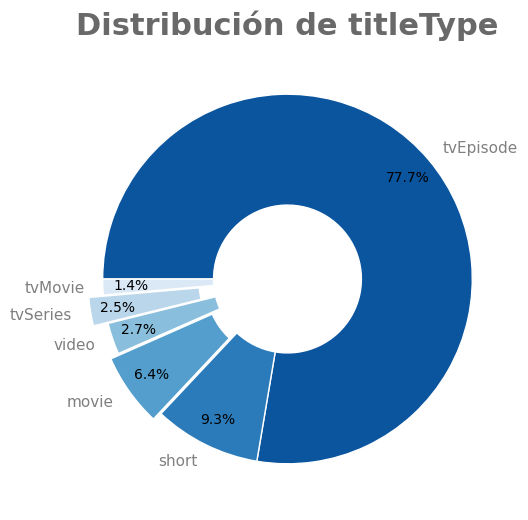

In [16]:
# Calcular el porcentaje de proportion para cada marca
df_titleType_frec['Porcentaje'] = df_titleType_frec['proportion'] / df_titleType_frec['proportion'].sum() * 100

greater = df_titleType_frec[df_titleType_frec['Porcentaje'] >= 0.9].copy()
greater = greater.sort_values(by='proportion', ascending=False)
colors = sns.color_palette('Blues_r', len(greater))
label_props = {'fontsize': 10, 'color': 'gray'}

fig, axs = plt.subplots(figsize=(10, 6),facecolor='none')
axs.set_facecolor('none')
axs.set_aspect('equal')
explode = [0,0,0.05,0,.08,0]
wedges, texts, autotexts = axs.pie(
    greater['proportion'],
    autopct='%1.1f%%',
    labels=greater['titleType'],
    textprops=label_props,
    pctdistance=0.85,
    startangle=180,
    wedgeprops=dict(width=0.6, edgecolor='w'),
    colors=colors,
    explode=explode,
    counterclock=False
)

# porcentajes:
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    # autotext.set_fontweight('bold')

# Etiquetas:
for text in texts:
    text.set_color('gray')
    text.set_fontsize(11)
    # text.set_fontweight('bold')

title = 'Distribución de titleType'
axs.set_title(title, fontsize=22, color='dimgray', fontweight='bold', pad=10)
plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graf_frec_titleType.png', dpi=300, transparent=True)
plt.show()


## Seleccionar tvSeries y movie.Convertir df a pandas.dataframe:


In [17]:
# seleccionar reducir el tamaño del df_title_basic selecioanando de la col titleType solamente 'movie' y 'tvSeries'
df_title_basics = df_title_basics[df_title_basics.titleType.isin(['movie', 'tvSeries'])] #titleType
df_title_basics.shape[0].compute()

948347

In [18]:
# convertir df_title_basics a pandas DataFrame
df_title_basics_pandas_movie_tvSeries = df_title_basics.compute()
df_title_basics_pandas_movie_tvSeries.shape

(948347, 9)

In [19]:
df_title_basics_pandas_movie_tvSeries.head(1)

tconst titleType primaryTitle originalTitle isAdult startYear endYear  \
8  tt0000009     movie   Miss Jerry    Miss Jerry       0      1894      \N   

  runtimeMinutes   genres  
8             45  Romance

## Eliminar duplicates and NaN:

In [20]:
# Eliminar todas las duplicados y NaN:
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries.drop_duplicates()
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries.drop_duplicates(subset=['tconst', 'originalTitle'])
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries.dropna(subset=['tconst', 'originalTitle'])
df_title_basics_pandas_movie_tvSeries.shape #(493133, 7)

(948345, 9)

## Eliminar valores \N:

In [21]:
# Eliminar las filas del df_title_basics_pandas_movie_tvSeries cuyas filas de runtimeMinutes tienen \N
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.runtimeMinutes != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.startYear != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.genres != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.tconst != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.originalTitle != '\\N']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.primaryTitle != '\\N']
df_title_basics_pandas_movie_tvSeries.shape

(493133, 9)

## Seleccionar filas convenientes:
* se eliminan ['primaryTitle','endYear']

In [22]:
# Descartar las columns=['primaryTitle','endYear']:
columns=['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres']
df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries[columns]
df_title_basics_pandas_movie_tvSeries.head(1)

tconst titleType primaryTitle originalTitle isAdult startYear  \
8  tt0000009     movie   Miss Jerry    Miss Jerry       0      1894   

  runtimeMinutes   genres  
8             45  Romance

In [25]:
df=df_title_basics_pandas_movie_tvSeries.copy()
df['titles_match'] = df['primaryTitle'] == df['originalTitle']
different_titles = df[df['titles_match'] == False]
print('DF con tvSeries y Movie completo',len(df))
print('DF con different_titles',len(different_titles))
different_titles

DF con tvSeries y Movie completo 493133
DF con different_titles 81509


In [36]:
# greader_primaryTitle_20 = df['primaryTitle'].value_counts()>20

title_counts = df['primaryTitle'].value_counts()
repeated_primaryTitle= title_counts[title_counts > 20]
title_counts = df['originalTitle'].value_counts()
repeated_originalTitle = title_counts[title_counts > 20]
print('primaryTitle', repeated_primaryTitle[0:10])
print('repeated_originalTitle', repeated_originalTitle[0:10])


primaryTitle primaryTitle
Home             43
Mother           38
Homecoming       35
Revenge          32
Love             32
Brothers         32
Alone            32
Paradise         30
Metamorphosis    30
Broken           30
Name: count, dtype: int64[pyarrow]
repeated_originalTitle originalTitle
Home              37
Broken            28
Solo              27
Anna              26
Hamlet            25
Run               25
Joulukalenteri    25
Maya              24
Paradise          23
Limbo             23
Name: count, dtype: int64[pyarrow]


In [ ]:
different_titles.head()

## Reducir memoria:

### Convertir la columna titleType a int8
* **movie=1**
* **tvSeries=0**

In [ ]:
# Mapeo:
# mapping = {'movie': 1, 'tvSeries': 0}

# Aplicamos el mapeo a la columna 'titleType' y convertimos a int8
# df_title_basics_pandas_movie_tvSeries['titleType'] = df_title_basics_pandas_movie_tvSeries['titleType'].map(mapping).astype('int8')
# df_title_basics_pandas_movie_tvSeries.info()


In [ ]:
df_title_basics_pandas_movie_tvSeries.titleType.unique()

In [37]:
# converitr a typo int las columnas: isAdult('int8'),
df_title_basics_pandas_movie_tvSeries['isAdult'] = df_title_basics_pandas_movie_tvSeries['isAdult'].astype('int8')
df_title_basics_pandas_movie_tvSeries['runtimeMinutes'] = df_title_basics_pandas_movie_tvSeries['runtimeMinutes'].astype('int32')
df_title_basics_pandas_movie_tvSeries['startYear'] = df_title_basics_pandas_movie_tvSeries['startYear'].astype('int16')

In [ ]:
df_title_basics_pandas_movie_tvSeries.info()

In [ ]:
# originalTitle
# df_title_basics_pandas_movie_tvSeries.originalTitle.value_counts()
len(df_title_basics_pandas_movie_tvSeries.originalTitle.unique())


## Elimino duplicates de originalTitle:

In [ ]:
# df_title_basics_pandas_movie_tvSeries = df_title_basics_pandas_movie_tvSeries.drop_duplicates(subset=['originalTitle'])
# df_title_basics_pandas_movie_tvSeries.shape

In [38]:
duplicate_titles = df_title_basics_pandas_movie_tvSeries['originalTitle'].value_counts()
duplicates = duplicate_titles[duplicate_titles > 1]
print('Duplicados en originaTitle =',len(duplicates))


Duplicados en originaTitle = 25863


In [ ]:
duplicates.head()

In [ ]:
df_title_basics_pandas_movie_tvSeries.info()

## Guardar el nuevo df:

In [39]:
# /content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis
df_title_basics_pandas_movie_tvSeries.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_basics_pandas_movie_tvSeries.csv', index=False)


### Abrir

In [40]:
df_title_basics_pandas_movie_tvSeries=pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_basics_pandas_movie_tvSeries.csv')

In [41]:
df_title_basics_pandas_movie_tvSeries.head(2)

tconst titleType                   primaryTitle  \
0  tt0000009     movie                     Miss Jerry   
1  tt0000147     movie  The Corbett-Fitzsimmons Fight   

                   originalTitle  isAdult  startYear  runtimeMinutes  \
0                     Miss Jerry        0       1894              45   
1  The Corbett-Fitzsimmons Fight        0       1897             100   

                   genres  
0                 Romance  
1  Documentary,News,Sport

In [42]:
origianlTitle_duplicates=df_title_basics_pandas_movie_tvSeries.originalTitle.value_counts()
origianlTitle_duplicates_up = origianlTitle_duplicates[origianlTitle_duplicates>10]
origianlTitle_duplicates_up.head(10)

originalTitle
Home              37
Broken            28
Solo              27
Anna              26
Run               25
Joulukalenteri    25
Hamlet            25
Maya              24
Paradise          23
Limbo             23
Name: count, dtype: int64

In [43]:
df_title_basics_pandas_movie_tvSeries_fil =df_title_basics_pandas_movie_tvSeries[df_title_basics_pandas_movie_tvSeries.originalTitle=='Love']
print(len(df_title_basics_pandas_movie_tvSeries_fil))
df_title_basics_pandas_movie_tvSeries_fil


19


tconst titleType primaryTitle originalTitle  isAdult  startYear  \
7185     tt0018107     movie         Love          Love        0       1927   
55475    tt0084271     movie         Love          Love        0       1982   
103043   tt0196715     movie         Love          Love        0       1920   
150693   tt0384293     movie         Love          Love        0       2003   
152526   tt0392360     movie         Love          Love        0       1991   
163813   tt0450363     movie         Love          Love        0       2005   
198232  tt10833600     movie         Love          Love        0       2004   
214426   tt1190130     movie         Love          Love        0       2008   
224284  tt12573294     movie         Love          Love        0       2020   
247255   tt1404048     movie         Love          Love        0       2008   
250873  tt14295864     movie         Love          Love        0       2021   
267754   tt1541874     movie         Love          Love        0       2011   
288234   tt1756603     movie         Love          Love        0       2010   
336445  tt24068194     movie         Love          Love        0       2023   
382549   tt3239216     movie         Love          Love        0       2014   
396146   tt3774694     movie         Love          Love        0       2015   
401813   tt4061080  tvSeries         Love          Love        0       2016   
456033   tt7059688     movie         Love          Love        0       2017   
479787   tt8769282     movie         Love          Love        0       2018   

        runtimeMinutes                 genres  
7185                82          Drama,Romance  
55475              105                  Drama  
103043              70                  Drama  
150693             104                  Drama  
152526             152  Drama,Musical,Romance  
163813              90         Drama,Thriller  
198232             165                Romance  
214426             102          Drama,Romance  
224284              92         Drama,Thriller  
247255             130                Romance  
250873              91   Comedy,Drama,Romance  
267754              84     Drama,Music,Sci-Fi  
288234              90            Documentary  
336445             103         Drama,Thriller  
382549             112            Documentary  
396146             135          Drama,Romance  
401813              50   Comedy,Drama,Romance  
456033              87                  Drama  
479787              60                  Drama

# SEGUNDA DDBB: df_title_rating

In [ ]:
df_title_ratings.head()

In [ ]:
df_title_ratings.shape[0].compute()


## Elimnar duplicates y NaN:

In [44]:
# Eliminar todas las duplicados y NaN:
df_title_ratings = df_title_ratings.drop_duplicates()
df_title_ratings = df_title_ratings.drop_duplicates(subset=['tconst'])
df_title_ratings = df_title_ratings.dropna(subset=['tconst'])
df_title_ratings.shape[0].compute()

1446041

## Seleccionar del df_title_ratings los codigos de la columna 'tconst'=tt.... que coinciden con los del df_basic_pandas

In [45]:
### Filtrar  y pasar el df a pandas ###

# Convertir la columna tconst de df_title_basics_pandas_movie_tvSeries a un set para una comparación eficiente
tconst_basics_set = set(df_title_basics_pandas_movie_tvSeries['tconst'])

# Definir una función para filtrar cada partición de df_title_ratings
def filter_partitions(partition, tconst_basics_set):
    return partition[partition['tconst'].isin(tconst_basics_set)]

# Aplicar la función de filtro a cada partición del DataFrame de Dask
filtered_df_title_ratings = df_title_ratings.map_partitions(filter_partitions, tconst_basics_set)
filtered_df_title_ratings = filtered_df_title_ratings.compute() # convertir a DataFrame de Pandas
filtered_df_title_ratings.head()

tconst  averageRating  numVotes
8    tt0000009          5.400       212
144  tt0000147          5.200       516
372  tt0000574          6.000       907
381  tt0000591          5.400        24
434  tt0000679          5.300        74

## Reduce memory:

In [46]:
filtered_df_title_ratings.averageRating=filtered_df_title_ratings.averageRating.astype('float16')
filtered_df_title_ratings.numVotes=filtered_df_title_ratings.numVotes.astype('int32')
filtered_df_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325912 entries, 8 to 1446036
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         325912 non-null  string 
 1   averageRating  325912 non-null  float16
 2   numVotes       325912 non-null  int32  
dtypes: float16(1), int32(1), string(1)
memory usage: 8.5 MB


## DDBB completa sin filtrar lo codigos tt que corresponden a tvSeries y movie:

In [47]:
df_title_ratings_pandas = df_title_ratings.compute() # convertir a DataFrame de Pandas
df_title_ratings_pandas.averageRating=df_title_ratings_pandas.averageRating.astype('float16')
df_title_ratings_pandas.numVotes=df_title_ratings_pandas.numVotes.astype('int32')
df_title_ratings_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446041 entries, 0 to 1446040
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1446041 non-null  string 
 1   averageRating  1446041 non-null  float16
 2   numVotes       1446041 non-null  int32  
dtypes: float16(1), int32(1), string(1)
memory usage: 26.5 MB


In [ ]:
df_title_ratings_pandas_movie_tvSeries = filtered_df_title_ratings.copy()

In [48]:
# DDBB filtrada
filtered_df_title_ratings.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_ratings_pandas_movie_tvSeries.csv', index=False)
# DDBB con todos los titleType
df_title_ratings_pandas.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_ratings_pandas.csv', index=False)

In [ ]:
df_title_ratings_pandas.shape

## Merge entre:
* df_title_basics_pandas_movie_tvSeries
* df_title_ratings_pandas

In [49]:
#unir df_title_basics_pandas_movie_tvSeries y df_title_ratings_pandas por la col tconst:
df_merged_basic_rating = pd.merge(df_title_basics_pandas_movie_tvSeries, df_title_ratings_pandas, on='tconst', how='inner')
df_merged_basic_rating.shape

(325912, 10)

In [50]:
df=df_merged_basic_rating.copy()
df_fil = df[df.originalTitle=='Love']
print(len(df_fil))
df_fil


17


tconst titleType primaryTitle originalTitle  isAdult  startYear  \
2846     tt0018107     movie         Love          Love        0       1927   
47360    tt0084271     movie         Love          Love        0       1982   
125378   tt0384293     movie         Love          Love        0       2003   
126708   tt0392360     movie         Love          Love        0       1991   
134713   tt0450363     movie         Love          Love        0       2005   
157991  tt10833600     movie         Love          Love        0       2004   
167839   tt1190130     movie         Love          Love        0       2008   
173105  tt12573294     movie         Love          Love        0       2020   
186092   tt1404048     movie         Love          Love        0       2008   
188165  tt14295864     movie         Love          Love        0       2021   
197728   tt1541874     movie         Love          Love        0       2011   
209839   tt1756603     movie         Love          Love        0       2010   
238114  tt24068194     movie         Love          Love        0       2023   
259224   tt3239216     movie         Love          Love        0       2014   
267054   tt3774694     movie         Love          Love        0       2015   
270556   tt4061080  tvSeries         Love          Love        0       2016   
318209   tt8769282     movie         Love          Love        0       2018   

        runtimeMinutes                 genres  averageRating  numVotes  
2846                82          Drama,Romance          6.801      1185  
47360              105                  Drama          5.500        42  
125378             104                  Drama          6.000        43  
126708             152  Drama,Musical,Romance          6.000      1646  
134713              90         Drama,Thriller          5.699       421  
157991             165                Romance          5.000        11  
167839             102          Drama,Romance          6.699       115  
173105              92         Drama,Thriller          7.000      1740  
186092             130                Romance          7.500        36  
188165              91   Comedy,Drama,Romance          5.199        70  
197728              84     Drama,Music,Sci-Fi          5.398      8977  
209839              90            Documentary          6.199         9  
238114             103         Drama,Thriller          4.199        90  
259224             112            Documentary          8.703        32  
267054             135          Drama,Romance          6.102     67262  
270556              50   Comedy,Drama,Romance          7.602     46189  
318209              60                  Drama          7.000        16

In [51]:
df_merged_basic_rating.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv', index=False)

In [52]:
df_merged_basic_rating =pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv')

# Tercer DDBB: df_title_rating

In [ ]:
df_tmdb.head(2)

## Tratar la columnas 'budget' and 'revenue': eliminar los valores menores a 0.

In [53]:
# Elimina los registros de df_tmdb donde 'budget' y 'revenue' sean menores o iguales a cero.
df_tmdb = df_tmdb[(df_tmdb['budget'] > 0) & (df_tmdb['revenue'] > 0)]
df_tmdb.shape[0].compute()

13556

## Tratar columnas:
* Cambio el nombre de la columna id= 'imbd'a 'tconst'
* Selecciono columnas convenientes.
* Creo la columna ROI.

In [54]:
# reducir el df a las col:'imdb_id', 'release_date', 'budget', 'revenue', 'genres', 'production_countries', 'vote_average', 'roi':
df_tmdb['tconst']=df_tmdb['imdb_id']
columns= ['tconst', 'release_date', 'budget', 'revenue', 'genres', 'production_countries', 'vote_average']
# Crear la col ROI:
df_tmdb = df_tmdb[columns]
df_tmdb['ROI'] = (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']
df_tmdb.head(1)

tconst release_date     budget    revenue  \
0  tt1375666   2010-07-15  160000000  825532764   

                               genres  \
0  Action, Science Fiction, Adventure   

                       production_countries  vote_average   ROI  
0  United Kingdom, United States of America         8.364 4.160


## Elimnar duplicates y NaN:

In [55]:
# Eliminar todas las duplicados y NaN:
df_tmdb = df_tmdb.drop_duplicates()
df_tmdb = df_tmdb.drop_duplicates(subset=['tconst'])
df_tmdb = df_tmdb.dropna(subset=['tconst'])
df_tmdb.shape[0].compute()

10862

In [56]:
df_tmdb.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 8 entries, tconst to ROI
dtypes: float64(2), int64(2), string(4)

## Seleccionar del df_title_ratings los codigos de la columna 'tconst'=tt.... que coinciden con los del df_basic_pandas

In [57]:
### Filtrar  y convertir el df a pandas ###

# Convertir la columna tconst de df_title_basics_pandas_movie_tvSeries a un set para una comparación eficiente
tconst_basics_set = set(df_title_basics_pandas_movie_tvSeries['tconst'])

# Definir una función para filtrar cada partición de df_title_ratings
def filter_partitions(partition, tconst_basics_set):
    return partition[partition['tconst'].isin(tconst_basics_set)]

# Aplicar la función de filtro a cada partición del DataFrame de Dask
filtered_df_tmdb = df_tmdb.map_partitions(filter_partitions, tconst_basics_set)
filtered_df_tmdb = filtered_df_tmdb.compute() # convertir a DataFrame de Pandas
filtered_df_tmdb.head(2)

tconst release_date     budget    revenue  \
0  tt1375666   2010-07-15  160000000  825532764   
1  tt0816692   2014-11-05  165000000  701729206   

                               genres  \
0  Action, Science Fiction, Adventure   
1   Adventure, Drama, Science Fiction   

                       production_countries  vote_average   ROI  
0  United Kingdom, United States of America         8.364 4.160  
1  United Kingdom, United States of America         8.417 3.253

In [58]:
(825532764-160000000)/160000000

4.159579775

In [59]:
filtered_df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9877 entries, 0 to 159657
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                9877 non-null   string 
 1   release_date          9830 non-null   string 
 2   budget                9877 non-null   int64  
 3   revenue               9877 non-null   int64  
 4   genres                9812 non-null   string 
 5   production_countries  9628 non-null   string 
 6   vote_average          9877 non-null   float64
 7   ROI                   9877 non-null   float64
dtypes: float64(2), int64(2), string(4)
memory usage: 1.1 MB


## Limpiar duplicados y NaN:

In [60]:
#eliminar duplicates y nan:
filtered_df_tmdb = filtered_df_tmdb.drop_duplicates()
filtered_df_tmdb = filtered_df_tmdb.dropna()
filtered_df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9604 entries, 0 to 153694
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                9604 non-null   string 
 1   release_date          9604 non-null   string 
 2   budget                9604 non-null   int64  
 3   revenue               9604 non-null   int64  
 4   genres                9604 non-null   string 
 5   production_countries  9604 non-null   string 
 6   vote_average          9604 non-null   float64
 7   ROI                   9604 non-null   float64
dtypes: float64(2), int64(2), string(4)
memory usage: 1.1 MB


## Tratar columna ROI:

<Axes: xlabel='ROI'>

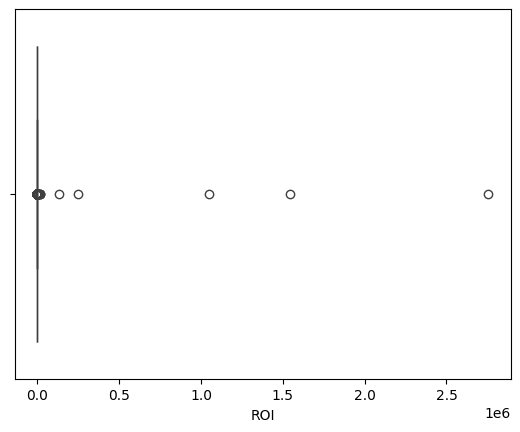

In [61]:
# ver outliers de col roi:
filtered_df_tmdb = filtered_df_tmdb.reset_index(drop=True)
sns.boxplot(x=filtered_df_tmdb['ROI'])

In [62]:
roi_descriptive_stats = filtered_df_tmdb['ROI'].describe()
print(roi_descriptive_stats)

count      9604.000
mean        608.215
std       34091.195
min          -1.000
25%          -0.343
50%           0.807
75%           2.893
max     2755583.000
Name: ROI, dtype: float64


In [63]:
# LIMITAR EL ROI: mínimo=-1 y maximo 10:
filtered_df_tmdb = filtered_df_tmdb[(filtered_df_tmdb['ROI'] >= -1) & (filtered_df_tmdb['ROI'] <= 10)]
filtered_df_tmdb.ROI.describe()

count   8942.000
mean       1.317
std        2.316
min       -1.000
25%       -0.408
50%        0.600
75%        2.273
max       10.000
Name: ROI, dtype: float64

In [64]:
filtered_df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8942 entries, 0 to 9603
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                8942 non-null   string 
 1   release_date          8942 non-null   string 
 2   budget                8942 non-null   int64  
 3   revenue               8942 non-null   int64  
 4   genres                8942 non-null   string 
 5   production_countries  8942 non-null   string 
 6   vote_average          8942 non-null   float64
 7   ROI                   8942 non-null   float64
dtypes: float64(2), int64(2), string(4)
memory usage: 1.0 MB


## Reduce memory:

In [65]:
filtered_df_tmdb.vote_average = filtered_df_tmdb.vote_average.astype('float16')
filtered_df_tmdb.ROI = filtered_df_tmdb.ROI.astype('float16')
filtered_df_tmdb['revenue_mll'] = filtered_df_tmdb['revenue']/1e6
filtered_df_tmdb['budget_mll'] = filtered_df_tmdb['budget']/1e6
filtered_df_tmdb['budget_mll'] = filtered_df_tmdb['budget_mll'].astype('uint16')
filtered_df_tmdb['revenue_mll'] = filtered_df_tmdb['revenue_mll'].astype('uint8')
filtered_df_tmdb['ROI'] = filtered_df_tmdb['ROI'].astype('float16')

# eliminar revenue and budget:
filtered_df_tmdb = filtered_df_tmdb.drop(['revenue', 'budget'], axis=1)
filtered_df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8942 entries, 0 to 9603
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tconst                8942 non-null   string 
 1   release_date          8942 non-null   string 
 2   genres                8942 non-null   string 
 3   production_countries  8942 non-null   string 
 4   vote_average          8942 non-null   float16
 5   ROI                   8942 non-null   float16
 6   revenue_mll           8942 non-null   uint8  
 7   budget_mll            8942 non-null   uint16 
dtypes: float16(2), string(4), uint16(1), uint8(1)
memory usage: 821.5 KB


<ipython-input-65-50b816594233>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_tmdb.vote_average = filtered_df_tmdb.vote_average.astype('float16')
<ipython-input-65-50b816594233>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_tmdb.ROI = filtered_df_tmdb.ROI.astype('float16')
<ipython-input-65-50b816594233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

## PAsar a type datetime la col: release_date:

In [66]:
# convertir la col release_date a datetime:
filtered_df_tmdb['release_date'] = pd.to_datetime(filtered_df_tmdb['release_date'])
filtered_df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8942 entries, 0 to 9603
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tconst                8942 non-null   string        
 1   release_date          8942 non-null   datetime64[ns]
 2   genres                8942 non-null   string        
 3   production_countries  8942 non-null   string        
 4   vote_average          8942 non-null   float16       
 5   ROI                   8942 non-null   float16       
 6   revenue_mll           8942 non-null   uint8         
 7   budget_mll            8942 non-null   uint16        
dtypes: datetime64[ns](1), float16(2), string(3), uint16(1), uint8(1)
memory usage: 768.0 KB


In [67]:
df_tmdb_pandas = filtered_df_tmdb.copy()

In [68]:
# Guardar en drive:
filtered_df_tmdb.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_tmdb_pandas.csv', index=False)

## Merge entre:
* df_merged_basic_rating
* df_tmdb_pandas

In [69]:
#unir df_title_basics_pandas_movie_tvSeries y df_title_ratings_pandas por la col tconst:
df_merged_basic_rating_tmdb = pd.merge(df_merged_basic_rating, df_tmdb_pandas, on='tconst', how='inner')
df_merged_basic_rating_tmdb.shape

(8897, 17)

In [70]:
# Guardar en drive:
df_merged_basic_rating_tmdb.to_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv', index=False)

In [78]:
# abrir de driva:
df_merged_basic_rating_tmdb=pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')

In [72]:
#@title
def preprocesamiento():
  global df_title_basics,df_title_ratings,df_tmdb
  #tu código aqui

In [73]:
# preprocesamiento()
# print(df_title_basics.info())
# print('-------------')
# print(df_title_ratings.info())
# print('-------------')
# print(df_tmdb.info())

In [74]:
df_title_basics_pandas_movie_tvSeries.head(1)

tconst titleType primaryTitle originalTitle  isAdult  startYear  \
0  tt0000009     movie   Miss Jerry    Miss Jerry        0       1894   

   runtimeMinutes   genres  
0              45  Romance

In [79]:
# df_title_ratings_pandas_movie_tvSeries.head()

In [ ]:
df_tmdb_pandas.head()

##**2.3 Análisis Exploratorio (EDA)**

In [80]:
df_merged_basic_rating_tmdb['release_date'] = pd.to_datetime(df_merged_basic_rating_tmdb['release_date'], errors='coerce')
df_merged_basic_rating_tmdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8897 entries, 0 to 8896
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tconst                8897 non-null   object        
 1   titleType             8897 non-null   object        
 2   primaryTitle          8897 non-null   object        
 3   originalTitle         8897 non-null   object        
 4   isAdult               8897 non-null   int64         
 5   startYear             8897 non-null   int64         
 6   runtimeMinutes        8897 non-null   int64         
 7   genres_x              8897 non-null   object        
 8   averageRating         8897 non-null   float64       
 9   numVotes              8897 non-null   int64         
 10  release_date          8897 non-null   datetime64[ns]
 11  genres_y              8897 non-null   object        
 12  production_countries  8897 non-null   object        
 13  vote_average      

In [ ]:
df_merged_basic_rating_tmdb.describe()

In [ ]:
df_title_basics_pandas_movie_tvSeries.describe()

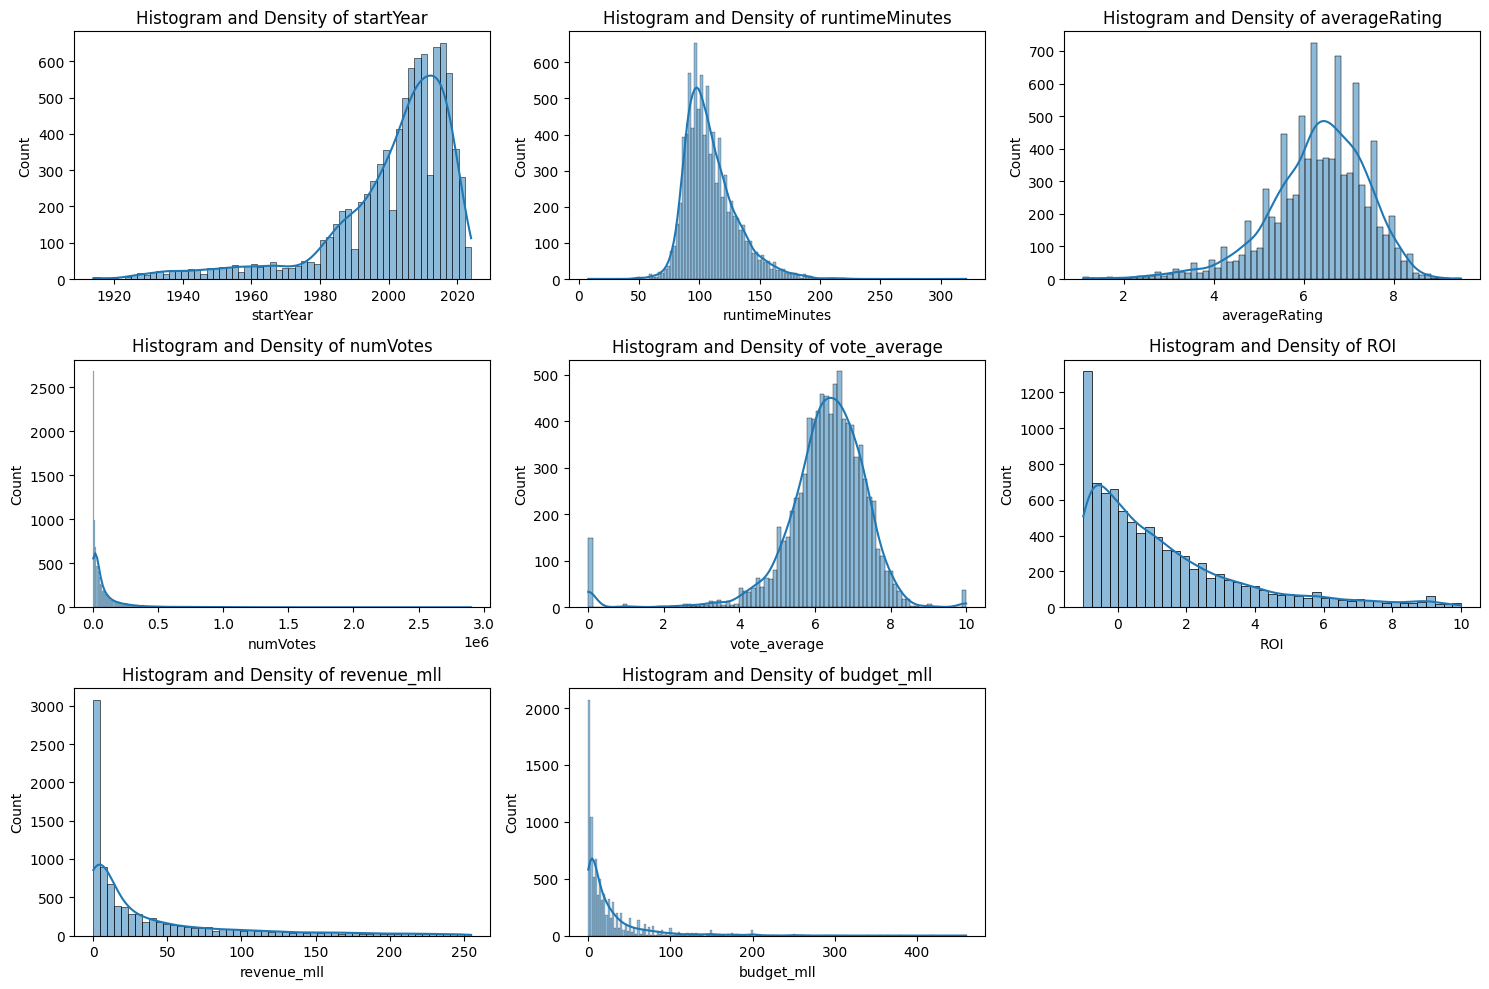

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el tamaño de los gráficos
plt.figure(figsize=(15, 10))

# Histogramas para todas las variables numéricas
numeric_cols = ['startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'vote_average', 'ROI', 'revenue_mll', 'budget_mll']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_merged_basic_rating_tmdb[col], kde=True)
    plt.title(f'Histogram and Density of {col}')

plt.tight_layout()
plt.show()


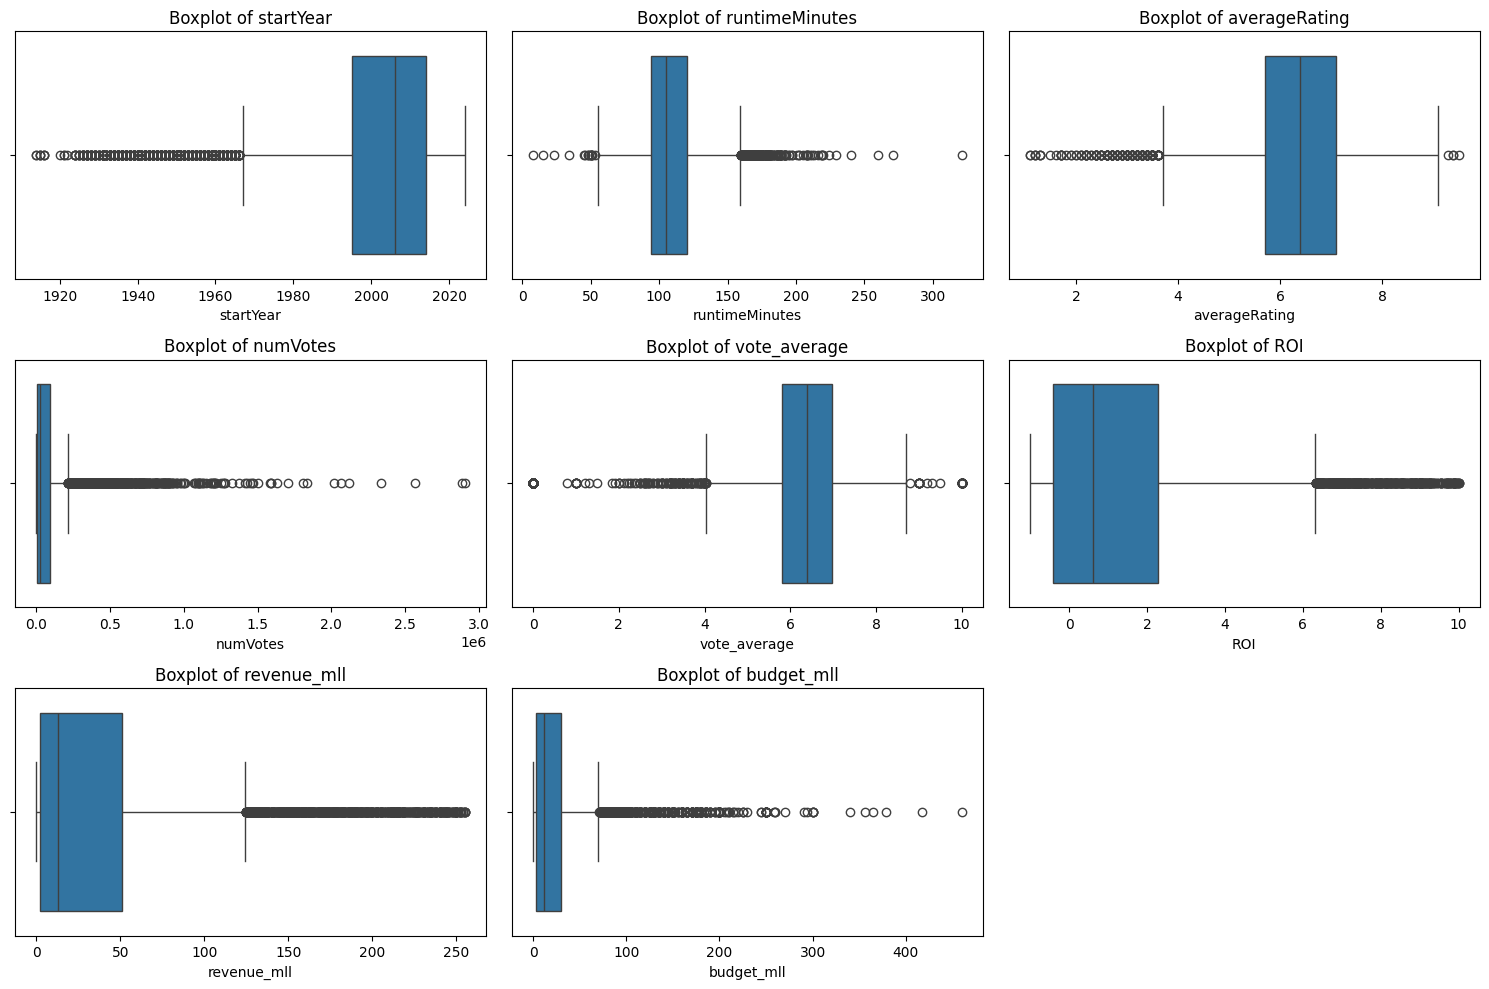

In [82]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_merged_basic_rating_tmdb[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


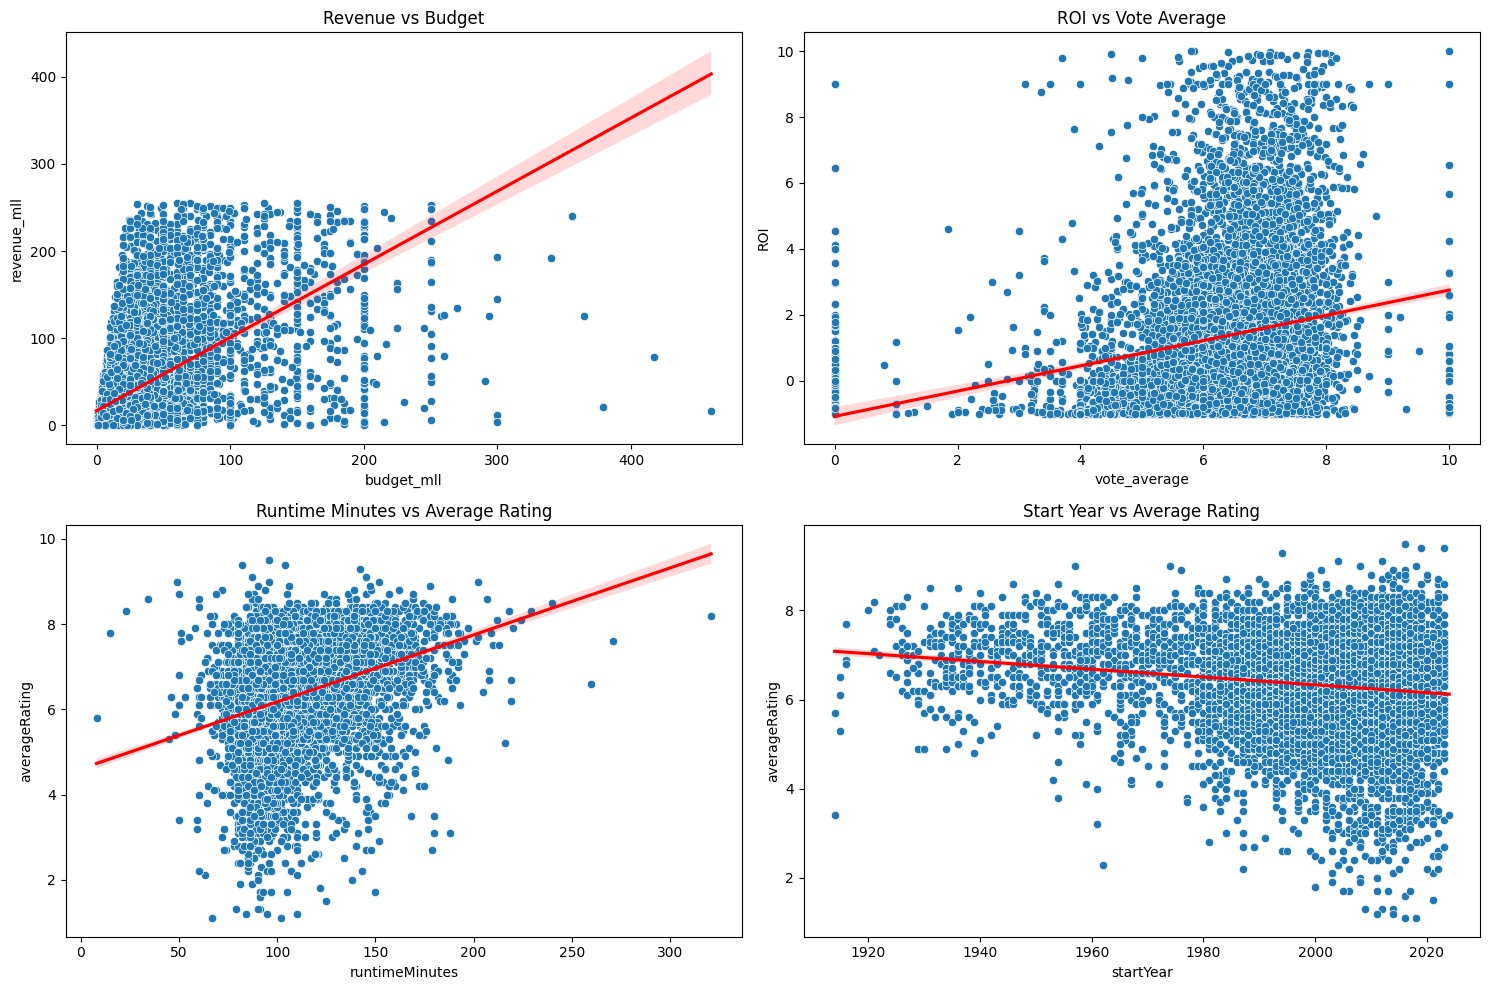

In [83]:
plt.figure(figsize=(15, 10))

# Relación entre 'revenue_mll' y 'budget_mll'
plt.subplot(2, 2, 1)
sns.scatterplot(x='budget_mll', y='revenue_mll', data=df_merged_basic_rating_tmdb)
sns.regplot(x='budget_mll', y='revenue_mll', data=df_merged_basic_rating_tmdb, scatter=False, color='red')
plt.title('Revenue vs Budget')

# Relación entre 'ROI' y 'vote_average'
plt.subplot(2, 2, 2)
sns.scatterplot(x='vote_average', y='ROI', data=df_merged_basic_rating_tmdb)
sns.regplot(x='vote_average', y='ROI', data=df_merged_basic_rating_tmdb, scatter=False, color='red')
plt.title('ROI vs Vote Average')

# Relación entre 'runtimeMinutes' y 'averageRating'
plt.subplot(2, 2, 3)
sns.scatterplot(x='runtimeMinutes', y='averageRating', data=df_merged_basic_rating_tmdb)
sns.regplot(x='runtimeMinutes', y='averageRating', data=df_merged_basic_rating_tmdb, scatter=False, color='red')
plt.title('Runtime Minutes vs Average Rating')

# Relación entre 'startYear' y 'averageRating'
plt.subplot(2, 2, 4)
sns.scatterplot(x='startYear', y='averageRating', data=df_merged_basic_rating_tmdb)
sns.regplot(x='startYear', y='averageRating', data=df_merged_basic_rating_tmdb, scatter=False, color='red')
plt.title('Start Year vs Average Rating')

plt.tight_layout()
plt.show()


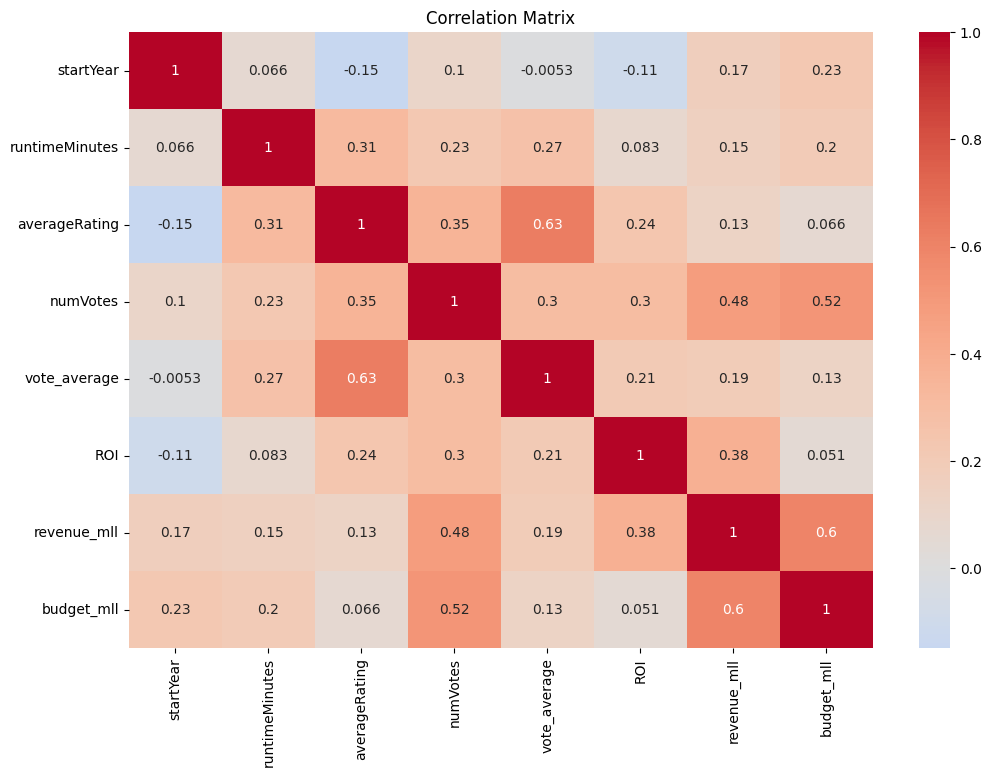

In [84]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_merged_basic_rating_tmdb[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [85]:
correlation_matrix

startYear  runtimeMinutes  averageRating  numVotes  \
startYear           1.000           0.066         -0.149     0.104   
runtimeMinutes      0.066           1.000          0.315     0.225   
averageRating      -0.149           0.315          1.000     0.355   
numVotes            0.104           0.225          0.355     1.000   
vote_average       -0.005           0.270          0.627     0.304   
ROI                -0.108           0.083          0.241     0.296   
revenue_mll         0.169           0.148          0.133     0.476   
budget_mll          0.226           0.200          0.066     0.515   

                vote_average    ROI  revenue_mll  budget_mll  
startYear             -0.005 -0.108        0.169       0.226  
runtimeMinutes         0.270  0.083        0.148       0.200  
averageRating          0.627  0.241        0.133       0.066  
numVotes               0.304  0.296        0.476       0.515  
vote_average           1.000  0.207        0.190       0.133  
ROI                    0.207  1.000        0.380       0.051  
revenue_mll            0.190  0.380        1.000       0.596  
budget_mll             0.133  0.051        0.596       1.000

In [86]:
df_merged_basic_rating_tmdb.titleType.value_counts()

titleType
movie       8892
tvSeries       5
Name: count, dtype: int64

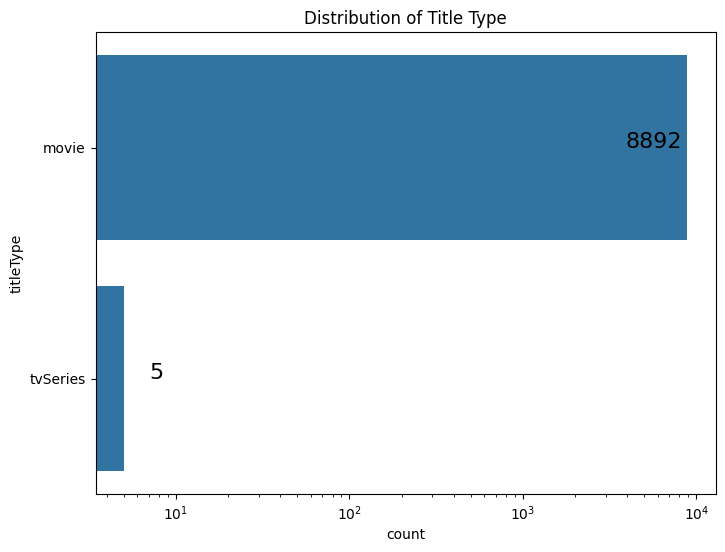

In [87]:
plt.figure(figsize=(8, 6))

sns.countplot(y='titleType', data=df_merged_basic_rating_tmdb, order=df_merged_basic_rating_tmdb['titleType'].value_counts().index)
plt.title('Distribution of Title Type')

title_counts = df_merged_basic_rating_tmdb['titleType'].value_counts()
for i, (title_type, count) in enumerate(title_counts.items()):
  if i == 0:
    plt.text(count - 5e3, i, f'{str(count)}',fontsize=16)
  else:
    plt.text(count +2, i, str(count),fontsize=16)

plt.xscale('log')
title_types = ['movie','tvSeries']
plt.yticks(ticks=range(len(title_counts)), labels=title_types)
plt.show()

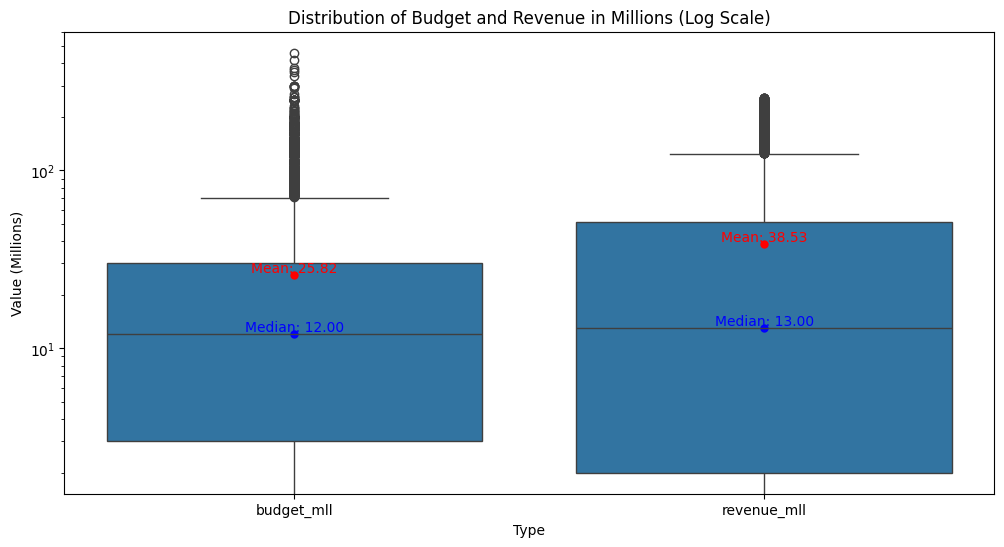

In [88]:
budget_revenue_df = df_merged_basic_rating_tmdb[['budget_mll', 'revenue_mll']].melt(var_name='Type', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Value', data=budget_revenue_df)
plt.yscale('log')
plt.title('Distribution of Budget and Revenue in Millions (Log Scale)')
plt.xlabel('Type')
plt.ylabel('Value (Millions)')

# Calcular y añadir la media y la mediana
for type_ in budget_revenue_df['Type'].unique():
    subset = budget_revenue_df[budget_revenue_df['Type'] == type_]
    mean = subset['Value'].mean()
    median = subset['Value'].median()

    # Añadir la media
    plt.plot([type_], [mean], marker='o', markersize=5, color='red')
    plt.text(x=type_, y=mean, s=f'Mean: {mean:.2f}', horizontalalignment='center', verticalalignment='bottom', color='red')

    # Añadir la mediana
    plt.plot([type_], [median], marker='o', markersize=5, color='blue')
    plt.text(x=type_, y=median, s=f'Median: {median:.2f}', horizontalalignment='center', verticalalignment='bottom', color='blue')

plt.show()


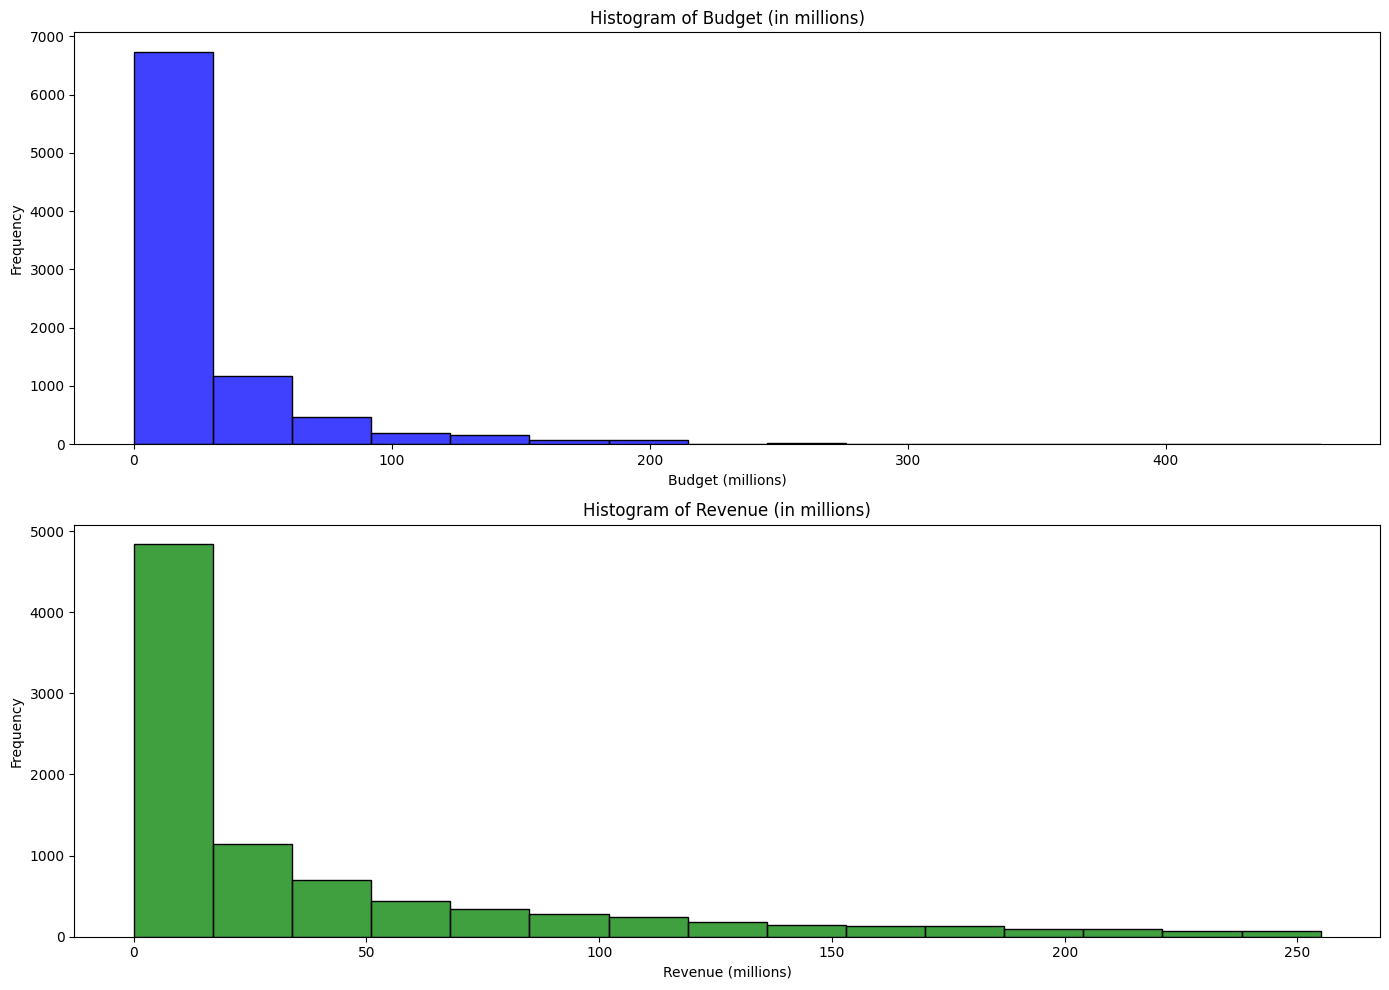

In [89]:
fig, axs = plt.subplots(2, figsize=(14, 10))

sns.histplot(df_merged_basic_rating_tmdb['budget_mll'], bins=15, kde=False, ax=axs[0], color='blue')
axs[0].set_title('Histogram of Budget (in millions)')
axs[0].set_xlabel('Budget (millions)')
axs[0].set_ylabel('Frequency')

sns.histplot(df_merged_basic_rating_tmdb['revenue_mll'], bins=15, kde=False, ax=axs[1], color='green')
axs[1].set_title('Histogram of Revenue (in millions)')
axs[1].set_xlabel('Revenue (millions)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


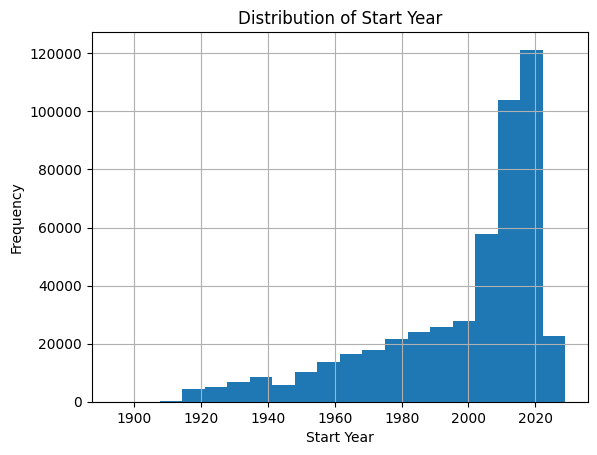

In [91]:
df_title_basics_pandas_movie_tvSeries = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_basics_pandas_movie_tvSeries.csv')
df_title_basics_pandas_movie_tvSeries.head()
df=df_title_basics_pandas_movie_tvSeries.copy()
df['startYear'].hist(bins=20)
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.title('Distribution of Start Year')
plt.show()

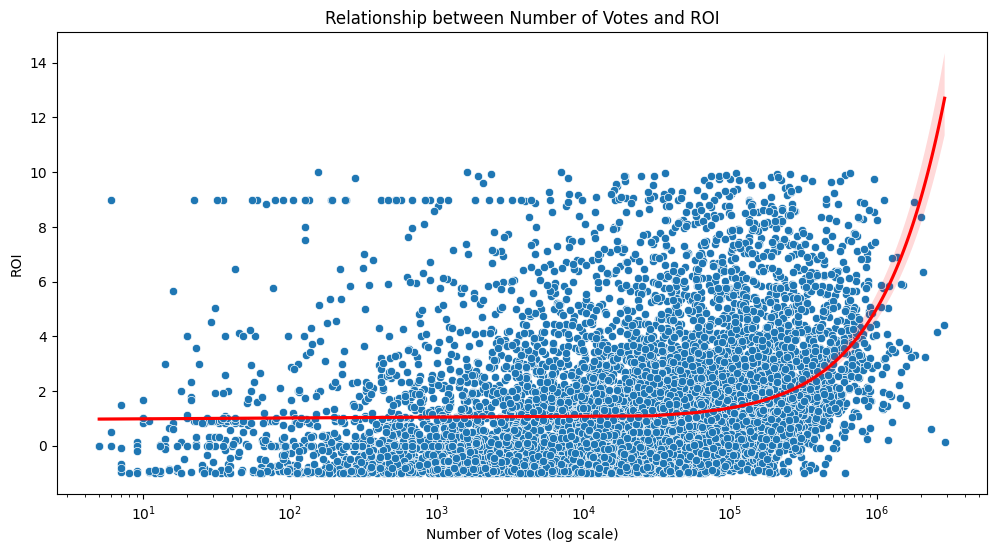

In [92]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='numVotes', y='ROI', data=df_merged_basic_rating_tmdb)

# Añadir una línea de regresión
sns.regplot(x='numVotes', y='ROI', data=df_merged_basic_rating_tmdb, scatter=False, color='red')

plt.xscale('log')  # Escala logarítmica en el eje x para mejor visualización
plt.title('Relationship between Number of Votes and ROI')
plt.xlabel('Number of Votes (log scale)')
plt.ylabel('ROI')
plt.show()


In [ ]:
df_merged_basic_rating_tmdb.head(1)

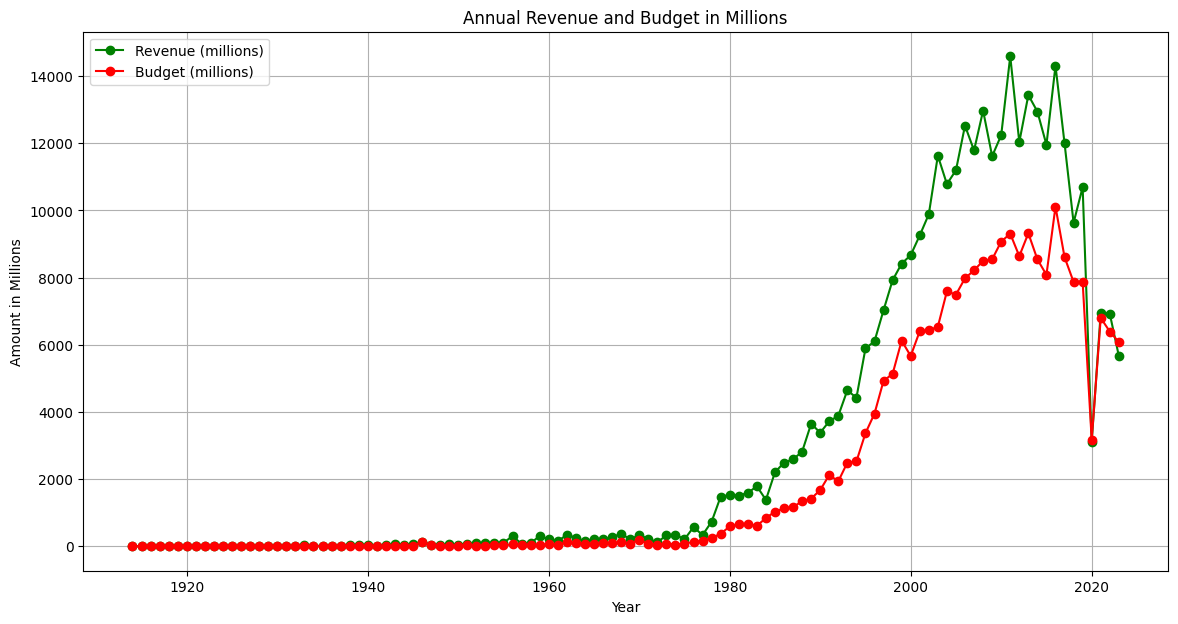

In [93]:
df_merged_basic_rating_tmdb_date = df_merged_basic_rating_tmdb.copy()

# Establecer 'release_date' como índice
df_merged_basic_rating_tmdb_date.set_index('release_date', inplace=True)

# Agrupar por año y sumar 'revenue_mll' y 'budget_mll'
annual_revenue = df_merged_basic_rating_tmdb_date.resample('Y').sum()['revenue_mll']
annual_budget = df_merged_basic_rating_tmdb_date.resample('Y').sum()['budget_mll']

# Graficar la serie temporal de 'revenue_mll' y 'budget_mll' por año
plt.figure(figsize=(14, 7))
plt.plot(annual_revenue.index.year, annual_revenue, marker='o', color='green', label='Revenue (millions)')
plt.plot(annual_budget.index.year, annual_budget, marker='o', color='red', linestyle='-', label='Budget (millions)')
plt.title('Annual Revenue and Budget in Millions')
plt.xlabel('Year')
plt.ylabel('Amount in Millions')
plt.grid(True)
plt.legend()
plt.show()


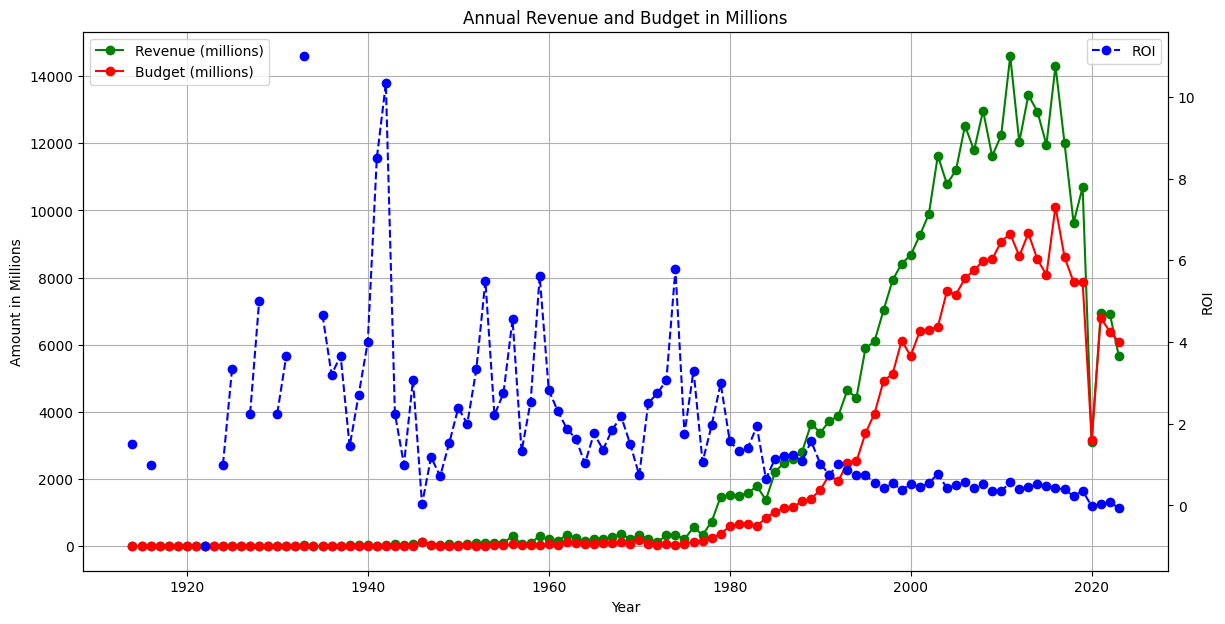

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumimos que df_merged_basic_rating_tmdb ya está cargado
df_merged_basic_rating_tmdb_date = df_merged_basic_rating_tmdb.copy()

# Establecer 'release_date' como índice
df_merged_basic_rating_tmdb_date.set_index('release_date', inplace=True)

# Agrupar por año y sumar 'revenue_mll' y 'budget_mll'
annual_revenue = df_merged_basic_rating_tmdb_date.resample('Y').sum()['revenue_mll']
annual_budget = df_merged_basic_rating_tmdb_date.resample('Y').sum()['budget_mll']

# Calcular el ROI anual
annual_roi = (annual_revenue - annual_budget) / annual_budget

# Crear la figura y el primer eje
fig, ax1 = plt.subplots(figsize=(14, 7))

# Graficar la serie temporal de 'revenue_mll' y 'budget_mll' por año
ax1.plot(annual_revenue.index.year, annual_revenue, marker='o', color='green', label='Revenue (millions)')
ax1.plot(annual_budget.index.year, annual_budget, marker='o', color='red', linestyle='-', label='Budget (millions)')
ax1.set_title('Annual Revenue and Budget in Millions')
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount in Millions')
ax1.legend(loc='upper left')
ax1.grid(True)

# Crear un segundo eje para el ROI
ax2 = ax1.twinx()
ax2.plot(annual_roi.index.year, annual_roi, marker='o', color='blue', linestyle='--', label='ROI')
ax2.set_ylabel('ROI')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.show()


#**3. Preguntas y respuestas**


---




##**Pregunta 1: ¿Cual es la evolución del rating por tipo de contenido?**

In [95]:
#@title
df_merged_basic_rating_tmdb.head()

tconst titleType                 primaryTitle  \
0  tt0004391     movie           Neptune's Daughter   
1  tt0004545     movie           Rose of the Rancho   
2  tt0005078     movie                    The Cheat   
3  tt0005393     movie  The Girl of the Golden West   
4  tt0006140     movie                   Temptation   

                 originalTitle  isAdult  startYear  runtimeMinutes  \
0           Neptune's Daughter        0       1914              70   
1           Rose of the Rancho        0       1914              50   
2                    The Cheat        0       1915              59   
3  The Girl of the Golden West        0       1915              45   
4                   Temptation        0       1915              60   

                   genres_x  averageRating  numVotes release_date  \
0                   Fantasy          5.700        60   1914-04-25   
1  Action,Adventure,Romance          3.400        45   1914-11-15   
2             Drama,Romance          6.500      2823   1915-12-13   
3           Romance,Western          5.300        77   1915-01-04   
4             Drama,Romance          6.100        23   1915-12-15   

                      genres_y      production_countries  vote_average   ROI  \
0                      Fantasy  United States of America         0.000 1.600   
1  Romance, Western, Adventure  United States of America         0.000 4.120   
2                        Drama  United States of America         5.984 6.934   
3             Western, Romance  United States of America         5.500 5.766   
4               Drama, Romance  United States of America         0.000 3.559   

   revenue_mll  budget_mll  
0            5           2  
1            0           0  
2            0           0  
3            0           0  
4            0           0

In [ ]:
df_merged_basic_rating.shape

In [ ]:
df_merged_basic_rating.shape

In [101]:
df_merged_basic_rating = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv')
avg_rating_by_year_type = df_merged_basic_rating.groupby(['startYear', 'titleType'])['averageRating'].mean().reset_index()
# Establecer rango de años desde 1990 a 2025 en la col startYear:
avg_rating_by_year_type_lim = avg_rating_by_year_type[(avg_rating_by_year_type['startYear'] >= 1990) & (avg_rating_by_year_type['startYear'] <= 2025)]

avg_rating_by_year_type_lim.head(5)

startYear titleType  averageRating
142       1990     movie          5.965
143       1990  tvSeries          7.017
144       1991     movie          6.047
145       1991  tvSeries          6.957
146       1992     movie          6.058

In [102]:
df_merged_basic_rating.titleType.value_counts(normalize=True)

titleType
movie      0.843
tvSeries   0.157
Name: proportion, dtype: float64

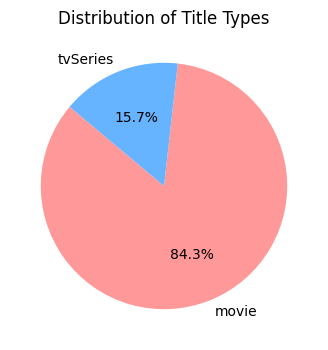

In [103]:
title_counts = df_merged_basic_rating['titleType'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(4, 4))
plt.pie(title_counts, labels=title_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Title Types')
plt.show()

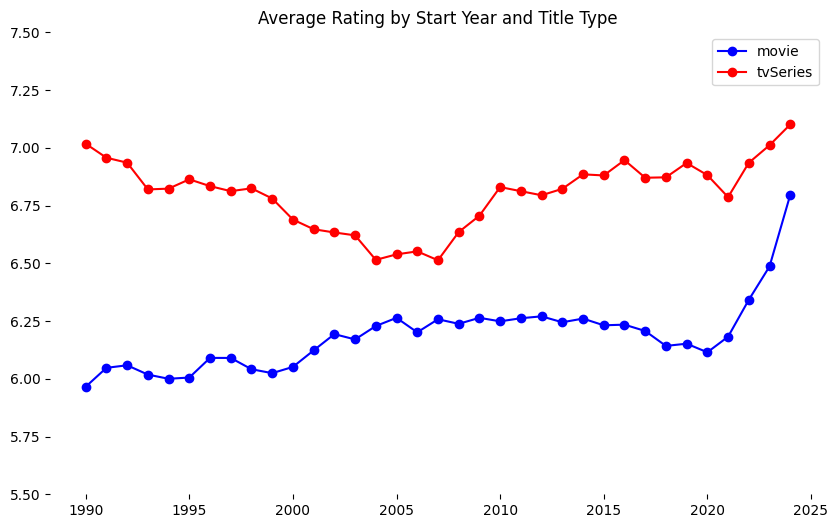

In [104]:
df=avg_rating_by_year_type_lim.copy()
df_type_movie = df[df['titleType'] == 'movie']
df_type_tvSeries = df[df['titleType'] == 'tvSeries']

# Graficar las líneas para cada tipo de título
plt.figure(figsize=(10, 6))
plt.plot(df_type_movie['startYear'], df_type_movie['averageRating'], marker='o', linestyle='-', color='blue', label='movie')
plt.plot(df_type_tvSeries['startYear'], df_type_tvSeries['averageRating'], marker='o', linestyle='-', color='red', label='tvSeries')

# Configurar el título y etiquetas de los ejes
plt.title('Average Rating by Start Year and Title Type')
plt.xlabel('')
plt.ylabel('')

# Agregar una leyenda para diferenciar las líneas
plt.legend()
#limitar la fecha desde 1990 a 2025 en xticks:
plt.xticks(range(1990, 2026, 5))
#limitar la fecha desde 1990 a 2025 en xlim:
# plt.xlim(1990, 2025)
plt.ylim(5.5, 7.5)
# graficar pai según titleType:


plt.grid(False)
plt.box(False)
plt.show()


##**Pregunta 2: ¿Cual es el rating promedio por género?**

In [ ]:
df_merged_basic_rating.head(1)

<ipython-input-109-54dd9d03f80b>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




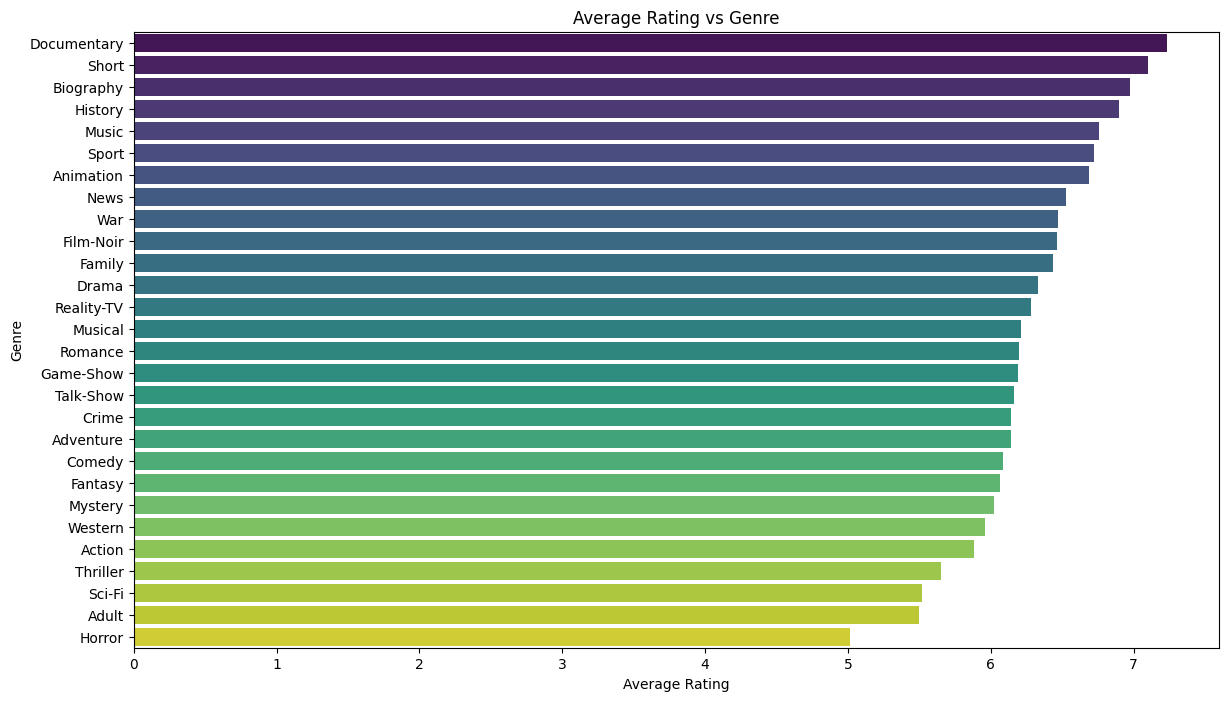

genre  avg_rating  movie_count
0   Documentary       7.235        51286
1         Short       7.102          558
2     Biography       6.978         9943
3       History       6.896         9839
4         Music       6.759         8956
5         Sport       6.721         4649
6     Animation       6.689        11481
7          News       6.526         1709
8           War       6.468         6396
9     Film-Noir       6.463          873
10       Family       6.433        16183
11        Drama       6.328       144290
12   Reality-TV       6.280         4925
13      Musical       6.215         6366
14      Romance       6.195        35925
15    Game-Show       6.192         2234
16    Talk-Show       6.162         2546
17        Crime       6.144        29823
18    Adventure       6.139        22384
19       Comedy       6.083        87220
20      Fantasy       6.065        10548
21      Mystery       6.021        13880
22      Western       5.957         5404
23       Action       5.882        33098
24     Thriller       5.649        25607
25       Sci-Fi       5.521         7989
26        Adult       5.496         3848
27       Horror       5.016        22201

In [109]:
df_merged_basic_rating = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv')

# Paso 1: Separar los múltiples valores en la columna 'genres'
df_merged_basic_rating_expanded = df_merged_basic_rating.assign(genre=df_merged_basic_rating['genres'].str.split(',')).explode('genre')

# Paso 3: Agrupar por 'genre' y calcular el promedio de 'averageRating' y el total de registros
df_genre_stats = df_merged_basic_rating_expanded.groupby('genre').agg(
    avg_rating=('averageRating', 'mean'),
    movie_count=('tconst', 'count')
).reset_index()
df_genre_stats.sort_values(by='avg_rating', ascending=False, inplace=True)
df_genre_stats.reset_index(drop=True, inplace=True)

# Graficar los resultados
plt.figure(figsize=(14, 8))

# Crear gráfico de barras
sns.barplot(data=df_genre_stats, x='avg_rating', y='genre', palette='viridis', orient='h')

# Añadir etiquetas y título
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Rating vs Genre')

# Mostrar el gráfico
plt.show()

df_genre_stats

In [ ]:
df_genre_stats.head()

          genre  avg_rating  movie_count
0         Drama       6.328       144290
1        Comedy       6.083        87220
2   Documentary       7.235        51286
3       Romance       6.195        35925
4        Action       5.882        33098
5         Crime       6.144        29823
6      Thriller       5.649        25607
7     Adventure       6.139        22384
8        Horror       5.016        22201
9        Family       6.433        16183
10      Mystery       6.021        13880
11    Animation       6.689        11481
12      Fantasy       6.065        10548
13    Biography       6.978         9943
14      History       6.896         9839
15        Music       6.759         8956
16       Sci-Fi       5.521         7989
17          War       6.468         6396
18      Musical       6.215         6366
19      Western       5.957         5404
20   Reality-TV       6.280         4925
21        Sport       6.721         4649
22        Adult       5.496         3848
23    Talk-Show 

<ipython-input-106-c8310007bb90>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




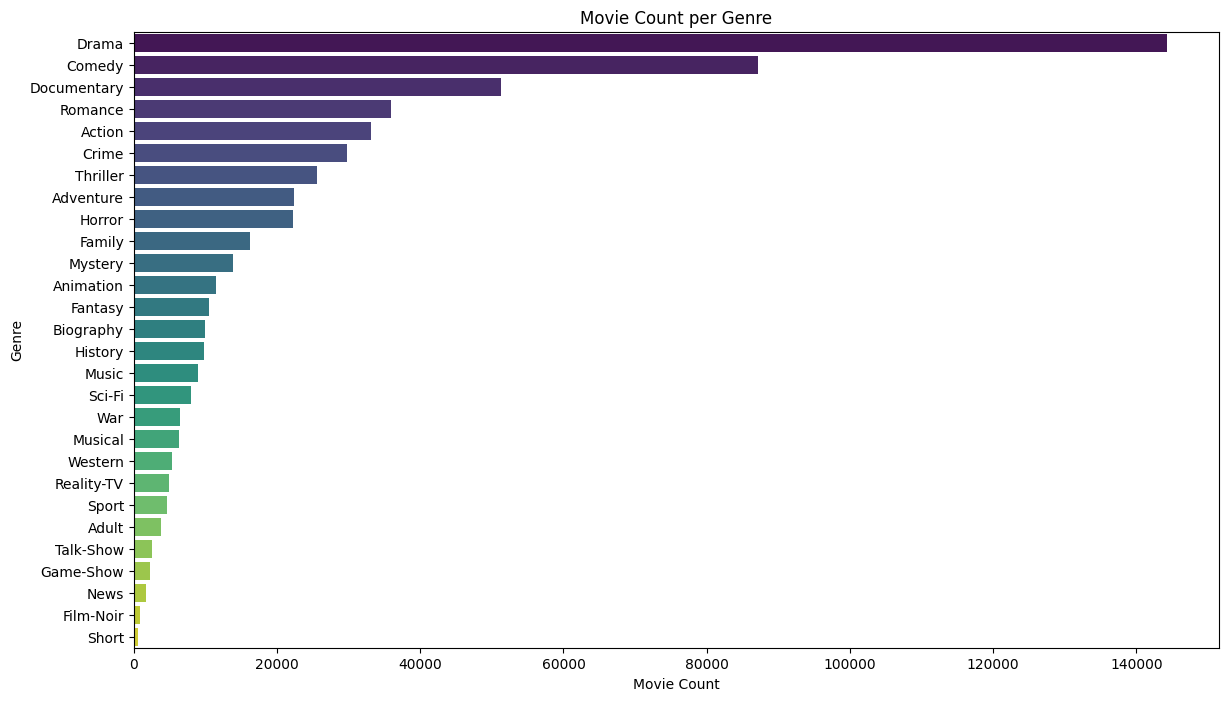

In [106]:
df_merged_basic_rating = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv')

# Paso 1: Separar los múltiples valores en la columna 'genres'
df_merged_basic_rating_expanded = df_merged_basic_rating.assign(genre=df_merged_basic_rating['genres'].str.split(',')).explode('genre')

# Paso 2: Agrupar por 'genre' y calcular el promedio de 'averageRating' y el total de registros
df_genre_stats = df_merged_basic_rating_expanded.groupby('genre').agg(
    avg_rating=('averageRating', 'mean'),
    movie_count=('tconst', 'count')
).reset_index()

# Ordenar por 'movie_count' en orden descendente
df_genre_stats.sort_values(by='movie_count', ascending=False, inplace=True)
df_genre_stats.reset_index(drop=True, inplace=True)

# Visualización del resultado
print(df_genre_stats)

plt.figure(figsize=(14, 8))

sns.barplot(data=df_genre_stats, x='movie_count', y='genre', palette='viridis', orient='h')

plt.xlabel('Movie Count')
plt.ylabel('Genre')
plt.title('Movie Count per Genre')
plt.show()

          genre  avg_rating  movie_count
0         Drama       6.328       144290
1        Comedy       6.083        87220
2   Documentary       7.235        51286
3       Romance       6.195        35925
4        Action       5.882        33098
5         Crime       6.144        29823
6      Thriller       5.649        25607
7     Adventure       6.139        22384
8        Horror       5.016        22201
9        Family       6.433        16183
10      Mystery       6.021        13880
11    Animation       6.689        11481
12      Fantasy       6.065        10548
13    Biography       6.978         9943
14      History       6.896         9839
15        Music       6.759         8956
16       Sci-Fi       5.521         7989
17          War       6.468         6396
18      Musical       6.215         6366
19      Western       5.957         5404
20   Reality-TV       6.280         4925
21        Sport       6.721         4649
22        Adult       5.496         3848
23    Talk-Show 

<ipython-input-107-592da0879248>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-107-592da0879248>:34: UserWarning:

FixedFormatter should only be used together with FixedLocator



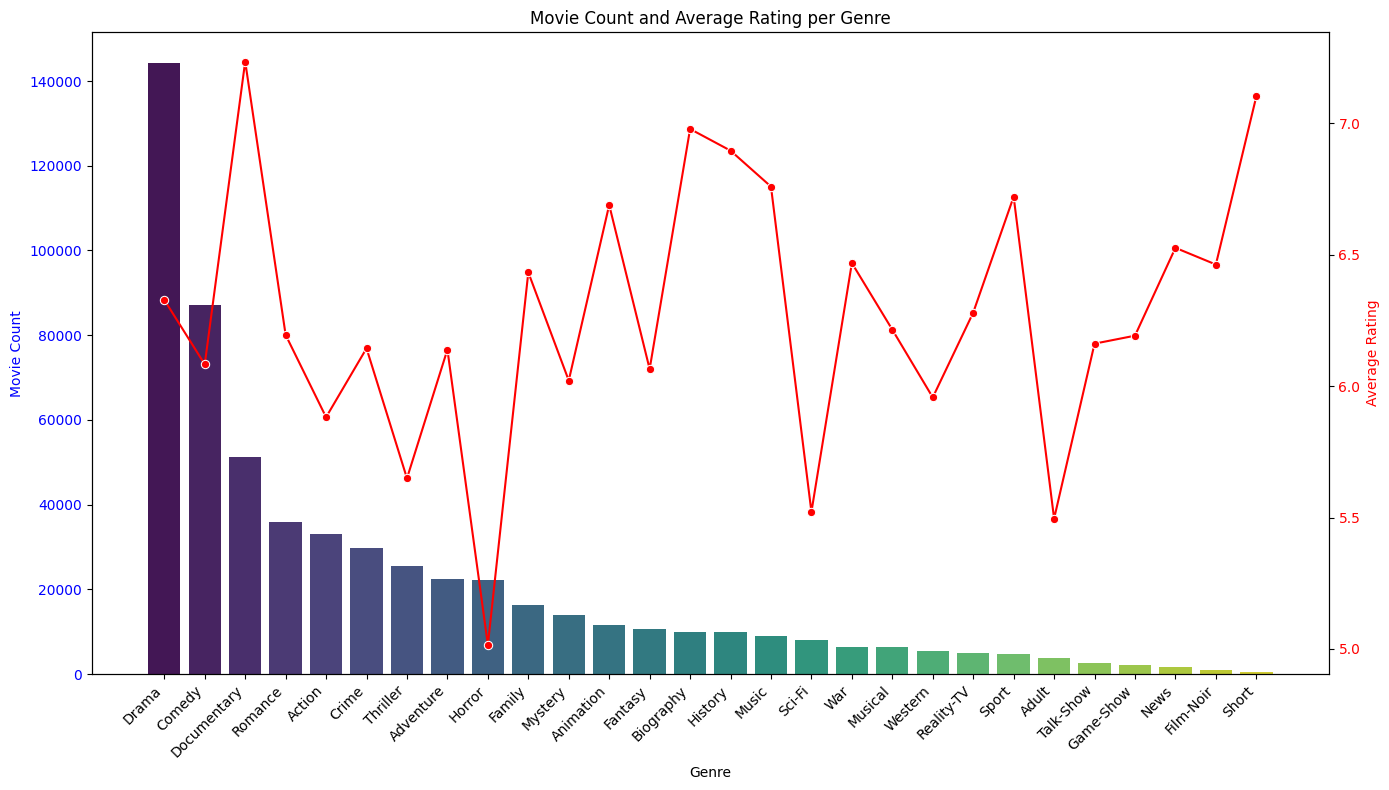

In [107]:
df_merged_basic_rating = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_basic_and_rating.csv')

# Paso 1: Separar los múltiples valores en la columna 'genres'
df_merged_basic_rating_expanded = df_merged_basic_rating.assign(genre=df_merged_basic_rating['genres'].str.split(',')).explode('genre')

# Paso 2: Agrupar por 'genre' y calcular el promedio de 'averageRating' y el total de registros
df_genre_stats = df_merged_basic_rating_expanded.groupby('genre').agg(
    avg_rating=('averageRating', 'mean'),
    movie_count=('tconst', 'count')
).reset_index()

# Ordenar por 'movie_count' en orden descendente
df_genre_stats.sort_values(by='movie_count', ascending=False, inplace=True)
df_genre_stats.reset_index(drop=True, inplace=True)

print(df_genre_stats)

fig, ax1 = plt.subplots(figsize=(14, 8))

# Crear gráfico de barras para el recuento de películas
sns.barplot(data=df_genre_stats, x='genre', y='movie_count', palette='viridis', ax=ax1)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Movie Count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje y
ax2 = ax1.twinx()
sns.lineplot(data=df_genre_stats, x='genre', y='avg_rating', color='r', marker='o', ax=ax2)
ax2.set_ylabel('Average Rating', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Movie Count and Average Rating per Genre')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

##**Pregunta 3: ¿Cuáles son los géneros que proporcionan mayor ROI?**

In [111]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_tmdb_pandas.csv')
df_title_basics_pandas_movie_tvSeries = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_title_basics_pandas_movie_tvSeries.csv')
# Merge por la col tconst:
df_tmdb_merged_basic = df.merge(df_title_basics_pandas_movie_tvSeries, on='tconst')
print(df_tmdb_pandas.shape)
print(df_title_basics_pandas_movie_tvSeries.shape)
print(df_tmdb_merged_basic.shape)
df_tmdb_expanded = df_tmdb_merged_basic.assign(genre=df_tmdb_merged_basic['genres_x'].str.split(',').explode('genre').str.strip()).explode('genre')
df_genre_roi = df_tmdb_expanded.groupby('genre')['ROI'].mean().sort_values(ascending=False).head(10).reset_index()
df_genre_roi

(8942, 8)
(493133, 8)
(8942, 15)


genre   ROI
0      Documentary 1.694
1  Science Fiction 1.694
2          Fantasy 1.637
3        Adventure 1.626
4           Action 1.493
5           Family 1.432
6          History 1.349
7        Animation 1.338
8              War 1.329
9            Music 1.278

<ipython-input-112-de070b2a03d3>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




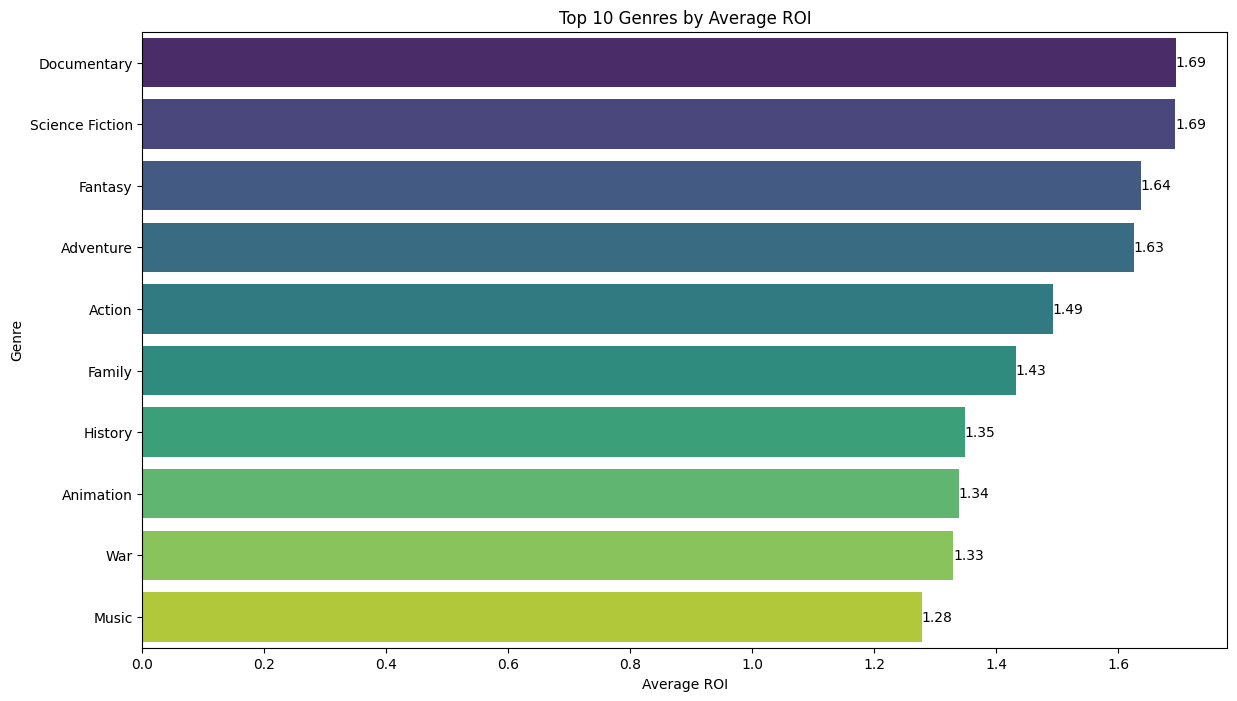

In [112]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df_genre_roi, x='ROI', y='genre', palette='viridis')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average ROI')
for i, v in enumerate(df_genre_roi['ROI']):
    plt.text(v, i, str(round(v, 2)), color='black', va='center')
plt.show()

##**Pregunta 4: ¿Cuáles son los países con mayor producción de contenido?**

In [113]:
df_all = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')

top_countries = 16
# Separar los múltiples valores en la columna 'production_countries'
df_tmdb_exploded_countries = df_all.assign(production_countries=df_all['production_countries'].str.split(',')).explode('production_countries').copy()
df_tmdb_exploded_countries['production_countries'] = df_tmdb_exploded_countries['production_countries'].str.strip()

# Agrupar por 'production_countries' y calcular el promedio de 'roi' y el total de registros
df_plot = df_tmdb_exploded_countries.groupby('production_countries').agg({'ROI': 'mean', 'production_countries': 'count','revenue_mll':'sum'})
df_plot.rename(columns={'production_countries': 'count'}, inplace=True)

# Ordenar los datos por el número de registros
df_plot = df_plot.sort_values(by='count', ascending=False).head(16).reset_index()
df_plot.sort_values(by='count', ascending=True, inplace=True)
df_plot

production_countries   ROI  count  revenue_mll
15                    Sweden 0.577     85         1248
14               South Korea 1.666     93         3080
13                 Hong Kong 1.312    120         7110
12                   Belgium 0.138    140         2240
11                 Australia 0.919    167         7182
10                     China 1.342    171        11016
9                     Russia 0.570    208         1592
8                      Italy 0.384    211         4370
7                      Japan 1.166    218         9530
6                      Spain 0.713    219         4778
5                     Canada 0.880    438        19235
4                    Germany 0.682    496        22147
3                      India 1.774    607        10043
2                     France 0.706    753        21483
1             United Kingdom 1.121   1064        45614
0   United States of America 1.425   6367       311089

In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')

top_countries = 16
# Separar los múltiples valores en la columna 'production_countries'
df_tmdb_exploded_countries = df_all.assign(production_countries=df_all['production_countries'].str.split(',')).explode('production_countries').copy()
df_tmdb_exploded_countries['production_countries'] = df_tmdb_exploded_countries['production_countries'].str.strip()

# Agrupar por 'production_countries' y calcular el promedio de 'roi' y el total de registros
df_plot = df_tmdb_exploded_countries.groupby('production_countries').agg({'ROI': 'mean', 'production_countries': 'count','revenue_mll':'sum'})
df_plot.rename(columns={'production_countries': 'count'}, inplace=True)

# Ordenar los datos por el número de registros
df_plot = df_plot.sort_values(by='count', ascending=False).head(16).reset_index()
df_plot.sort_values(by='count', ascending=True, inplace=True)
df_plot

production_countries   ROI  count  revenue_mll
15                    Sweden 0.577     85         1248
14               South Korea 1.666     93         3080
13                 Hong Kong 1.312    120         7110
12                   Belgium 0.138    140         2240
11                 Australia 0.919    167         7182
10                     China 1.342    171        11016
9                     Russia 0.570    208         1592
8                      Italy 0.384    211         4370
7                      Japan 1.166    218         9530
6                      Spain 0.713    219         4778
5                     Canada 0.880    438        19235
4                    Germany 0.682    496        22147
3                      India 1.774    607        10043
2                     France 0.706    753        21483
1             United Kingdom 1.121   1064        45614
0   United States of America 1.425   6367       311089

<ipython-input-208-9cc2d8879efe>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-208-9cc2d8879efe>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



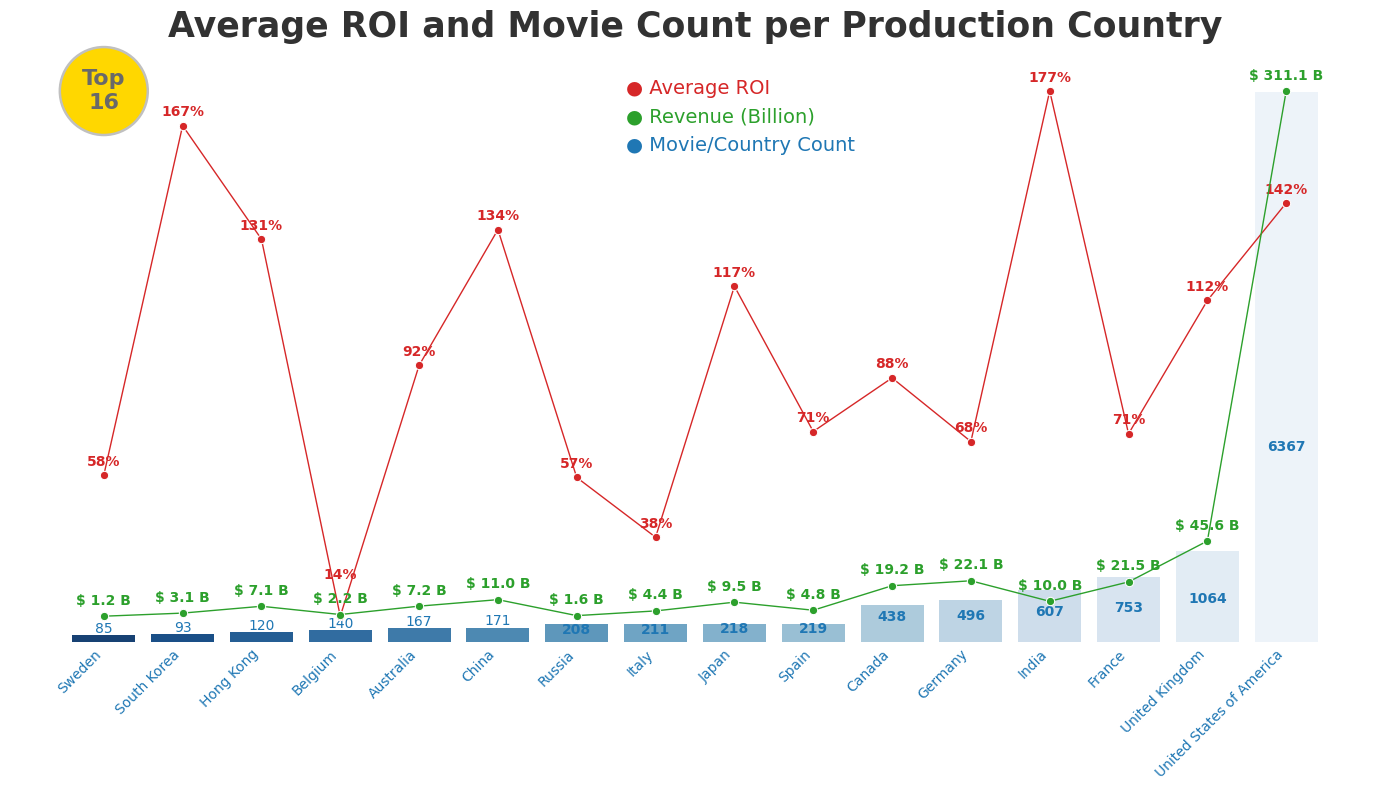

In [208]:
# from ast import If

color_blue = 'tab:blue'
color_red = 'tab:red'
color_green = 'tab:green'

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='none')

# Gráfico de barras para el conteo de películas por país de producción
sns.barplot(x='production_countries', y='count', data=df_plot, palette='Blues_r', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right',color= color_blue)
ax1.tick_params(axis='y', left=False, labelleft=False)
ax1.tick_params(axis='x', bottom=False)
ax1.set_xlabel('')
ax1.set_ylabel('')

# Agregar valores al final de las barras
for p in ax1.patches:
  if p.get_height() < 200:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()-70),
                 ha='center', va='center',
                 xytext=(0, 9),
                 color=color_blue,
                 textcoords='offset points')
  if p.get_height() < 400:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()-210),
                 ha='center', va='center',
                 xytext=(0, 9),
                 color=color_blue,
                 fontweight='bold',
                 textcoords='offset points')
  else:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()/3),
                 ha='center', va='center',
                 xytext=(0, 9),
                 color=color_blue,
                 fontweight='bold',
                 textcoords='offset points')

# Crear un segundo eje para el ROI promedio
ax2 = ax1.twinx()
sns.lineplot(x='production_countries', y='ROI', data=df_plot, color=color_red, marker='o', linewidth=1, ax=ax2)
ax2.tick_params(axis='y', right=False, labelright=False)
ax2.set_ylabel('')

# Colocar valores en los puntos de cada valor de ROI
for i, v in enumerate(df_plot['ROI']):
    ax2.text(i, v + 0.02 if v > 0.15 else v + 0.15, f'{v:.0%}', ha='center', va='bottom' if v > 0.15 else 'top', color='tab:red',fontweight='bold')

# Crear un tercer eje para revenue_mll
ax3 = ax1.twinx()

# Ajustar la posición del tercer eje
ax3.spines['right'].set_position(('outward', 60))  # Mover el tercer eje 60 puntos a la derecha
sns.lineplot(x='production_countries', y='revenue_mll', data=df_plot, color=color_green, marker='o', linewidth=1, ax=ax3)
ax3.tick_params(axis='y', right=False, labelright=False)
ax3.set_ylabel('')

# Colocar valores en los puntos de cada valor de revenue_mll
for i, v in enumerate(df_plot['revenue_mll']):
    ax3.text(i, v + 5000, f'$ {v / 1e3:.1f} B', ha='center', va='bottom', color=color_green,fontweight='bold')

# Título del gráfico
plt.title(f'Average ROI and Movie Count per Production Country', fontsize=25, color='#323232',fontweight='bold',pad=20)

# Quitar los marcos y las rayas de los ticks
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

ax1.tick_params(axis='both', length=0)
ax2.tick_params(axis='both', length=0)
ax3.tick_params(axis='both', length=0)

# Agregar anotaciones para los nombres de cada gráfica
ax2.annotate('● Average ROI', xy=(0.45, 0.95), xycoords='axes fraction', fontsize=14, color=color_red, ha='left')
ax3.annotate('● Revenue (Billion)', xy=(0.45, 0.90), xycoords='axes fraction', fontsize=14, color=color_green, ha='left')
ax1.annotate('● Movie/Country Count', xy=(0.45, 0.85), xycoords='axes fraction', fontsize=14, color=color_blue, ha='left')


plt.annotate(f'Top\n{top_countries}',
                xy=(0, df_plot['revenue_mll'].max()),
                xytext=(0, 0),
                textcoords='offset points',
                ha='center', va='center',
                fontsize=16, color='dimgray', fontweight='bold',
                bbox=dict(boxstyle="circle, pad=1", edgecolor='silver', facecolor='gold', lw=1.8))


plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/movie_country_count_roi_revenue.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


In [65]:
# import plotly.express as px

# # Asignar posiciones fijas en una cuadrícula
# num_countries = len(df_plot)
# grid_size = int(np.ceil(np.sqrt(num_countries)))
# df_plot['x'] = np.tile(np.arange(grid_size), grid_size)[:num_countries]
# df_plot['y'] = np.repeat(np.arange(grid_size), grid_size)[:num_countries]

# # Crear el gráfico de burbujas usando Plotly
# fig = px.scatter(df_plot, x='x', y='y',
#                  size='count', color='ROI',
#                  text='production_countries',
#                  color_continuous_scale='Blues',
#                  size_max=85,
#                  labels={'x': 'Grid X', 'y': 'Grid Y', 'roi': 'Average ROI', 'count': 'Movie Count'},
#                  title=f'Average ROI and Movie Count per Production Country (Top {top_countries})')
# fig.show()

In [10]:
import plotly.express as px

df_plot['text'] = df_plot['production_countries'] + '<br>ROI: ' + df_plot['ROI'].round(2).astype(str) + '<br>Count: ' + df_plot['count'].astype(str)

fig = px.scatter(df_plot, x='x', y='y',
                 size='count', color='ROI',
                 text='text',
                 color_continuous_scale='Greens',
                 size_max=75,
                 labels={'x': '', 'y': '', 'roi': '', 'count': ''},
                #  labels={'x': 'Grid X', 'y': 'Grid Y', 'roi': 'Average ROI', 'count': 'Movie Count'},
                 title=f'Average ROI and Movie Count per Production Country (Top {top_countries})')

fig.update_layout(
    showlegend=False,
    xaxis=dict(showticklabels=False),
    yaxis=dict(showticklabels=False)
)
fig.show()

In [64]:
import plotly.express as px

df_plot['text'] = df_plot['production_countries'] + '<br>ROI: ' + df_plot['ROI'].round(2).astype(str) + '<br>Count: ' + df_plot['count'].astype(str)

# Crear el gráfico de burbujas usando Plotly
fig = px.scatter(df_plot, x='x', y='y',
                 size='count', color='ROI',
                 text='text',
                 color_continuous_scale='Greens',
                 size_max=85,
                 labels={'x': '', 'y': '', 'roi': '', 'count': ''},
                 title=f'Average ROI and Movie Count per Production Country (Top {top_countries})')

# Eliminar la barra de color lateral
fig.update_coloraxes(showscale=False)

# Aumentar la distancia entre los datos ajustando los límites del eje
fig.update_xaxes(range=[-1, df_plot['x'].max() + 1])
fig.update_yaxes(range=[-1, df_plot['y'].max() + 1])

# Actualizar los trazos para cambiar el estilo del texto y agregar el borde a las burbujas
fig.update_traces(
    textfont=dict(size=11, color='#323232', family="Arial Black"),
    marker=dict(
        line=dict(color='darkgreen', width=1)  # Color del borde y grosor de la línea
    )
)

fig.update_layout(
    showlegend=False,
    xaxis=dict(showticklabels=False, showgrid=False, zeroline=False),
    yaxis=dict(showticklabels=False, showgrid=False, zeroline=False),
    plot_bgcolor='rgba(0,0,0,0)',  # Quitar el color de fondo de la gráfica
    # plot_bgcolor='#ecf8ff',  # Quitar el color de fondo de la gráfica
    paper_bgcolor='rgba(0,0,0,0)',  # Quitar el color de fondo del papel
    # paper_bgcolor='lightsteelblue',  # Quitar el color de fondo del papel
    margin=dict(l=20, r=20, t=40, b=20),  # Aumentar los márgenes
    title=dict(
        text=f'Average ROI and Movie Count per Production Country (Top {top_countries})',
        font=dict(
            family='Arial Black',
            size=25,
            color='#3c3c3c'
        ),
        xref='paper',
        x=0.5  # Centrar el título
    )
)
# fig.write_image("/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/movie_country_count_roi_revenue_buble.png", format="png", width=800, height=600, scale=3)

fig.show()


# Word Colud

In [ ]:
from wordcloud import WordCloud

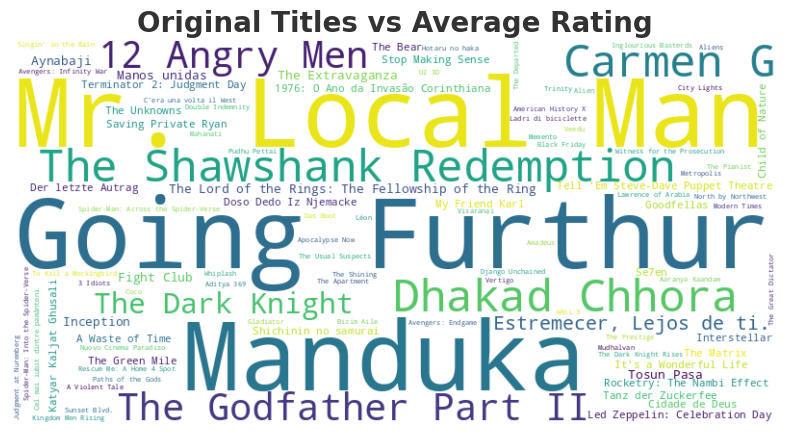

In [73]:
# Word Cloud basado en Original Titles vs Average Rating
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')
df_cleaned = df.dropna(subset=['originalTitle', 'averageRating', 'numVotes'])
title_rating_dict = df_cleaned.set_index('originalTitle')['averageRating'].to_dict()
wordcloud_rating = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_rating_dict)
plt.figure(figsize=(10, 5),facecolor='none')
plt.imshow(wordcloud_rating, interpolation='bilinear')
plt.title('Original Titles vs Average Rating',fontsize=20, color='#323232', fontweight= 'bold')
plt.axis('off')
plt.savefig("/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/wordCloud_originaleTitle_vs_rating.png", dpi=300, transparent=True)
plt.show()

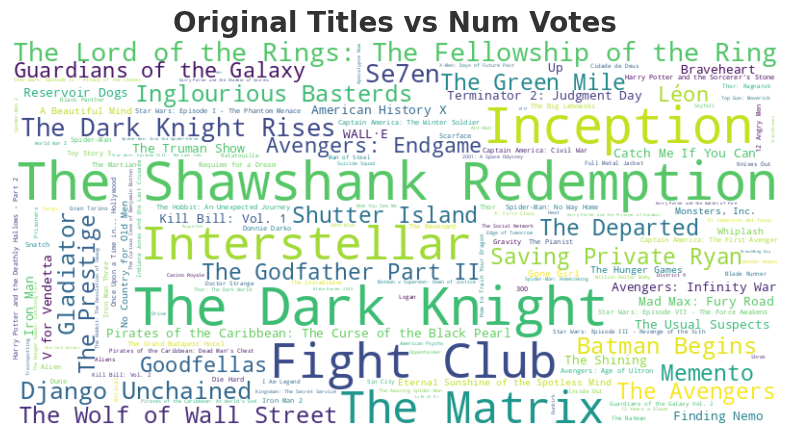

In [74]:
# Word Cloud basado en Original Titles vs Num Votes
title_votes_dict = df_cleaned.set_index('originalTitle')['numVotes'].to_dict()
wordcloud_votes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_votes_dict)
plt.figure(figsize=(10, 5),facecolor='none')
plt.imshow(wordcloud_votes, interpolation='bilinear')
plt.title('Original Titles vs Num Votes',fontsize=20, color='#323232', fontweight= 'bold')
plt.axis('off')
plt.savefig("/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/wordCloud_originaleTitle_vs_numVotes.png", dpi=300, transparent=True)
plt.show()

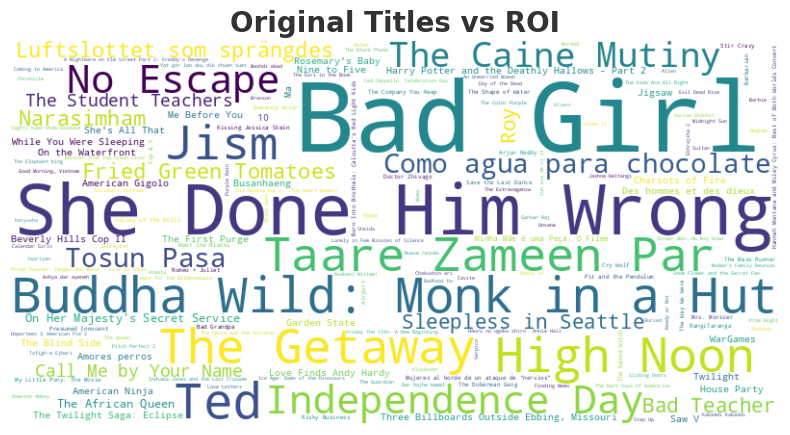

In [75]:
# Word Cloud basado en Original Titles vs ROI
title_votes_dict = df_cleaned.set_index('originalTitle')['ROI'].to_dict()
wordcloud_votes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_votes_dict)
plt.figure(figsize=(10, 5),facecolor='none')
plt.imshow(wordcloud_votes, interpolation='bilinear')
plt.title('Original Titles vs ROI',fontsize=20, color='#323232', fontweight= 'bold')
plt.axis('off')
plt.savefig("/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/wordCloud_originaleTitle_vs_ROI.png", dpi=300, transparent=True)
plt.show()

# buscar por country y mostrar por año cuales son los genres mas vistos

In [142]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')
df.head(1)

tconst titleType        primaryTitle       originalTitle  isAdult  \
0  tt0004391     movie  Neptune's Daughter  Neptune's Daughter        0   

   startYear  runtimeMinutes genres_x  averageRating  numVotes release_date  \
0       1914              70  Fantasy          5.700        60   1914-04-25   

  genres_y      production_countries  vote_average   ROI  revenue_mll  \
0  Fantasy  United States of America         0.000 1.600            5   

   budget_mll  
0           2

In [133]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')
# Paso 1: Separar los múltiples valores en la columna 'genres'
df = df.assign(genre=df['genres_x'].str.split(',')).explode('genre')

# Función para encontrar los géneros más vistos por país y por año
def géneros_más_vistos(df, country):
    # Filtrar por país
    df_country = df[df['production_countries'] == country]
    # Agrupar por año y género, y contar el número de películas
    grouped = df_country.groupby(['startYear', 'genre']).size().reset_index(name='counts')
    # Encontrar los géneros más populares cada año
    most_popular_genres = grouped.loc[grouped.groupby('startYear')['counts'].idxmax()]
    return most_popular_genres

# Ejemplo de uso: encontrar los géneros más vistos en USA
country = 'United States of America'
result = géneros_más_vistos(df, country)
# Filtrar para incluir solo las películas lanzadas entre 1990 y 2025
result = result[(result['startYear'] >= 1990) & (result['startYear'] < 2025)]
result


startYear   genre  counts
838        1990   Drama      32
856        1991   Drama      47
872        1992   Drama      33
889        1993   Drama      54
906        1994  Comedy      43
926        1995   Drama      51
943        1996   Drama      56
962        1997   Drama      60
977        1998  Comedy      58
999        1999   Drama      59
1018       2000   Drama      52
1034       2001  Comedy      49
1055       2002   Drama      62
1070       2003  Comedy      51
1090       2004  Comedy      56
1112       2005   Drama      61
1130       2006  Comedy      63
1154       2007   Drama      64
1170       2008  Comedy      60
1190       2009  Comedy      64
1213       2010   Drama      64
1231       2011  Comedy      60
1252       2012   Drama      60
1273       2013   Drama      61
1290       2014   Drama      77
1308       2015  Comedy      52
1328       2016   Drama      57
1347       2017   Drama      47
1367       2018   Drama      49
1382       2019  Comedy      30
1406       2020   Drama      23
1416       2021  Action      25
1432       2022  Action      27
1452       2023  Comedy      17

In [150]:
import pandas as pd

# Cargar el DataFrame
df = pd.read_csv('/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/df_merged_basic_rating_tmdb.csv')

# Paso 1: Separar los múltiples valores en la columna 'genres'
df = df.assign(genre=df['genres_x'].str.split(',')).explode('genre')

top_countries = 16
# Separar los múltiples valores en la columna 'production_countries'
df = df.assign(production_countries=df['production_countries'].str.split(',')).explode('production_countries').copy()
df['production_countries'] = df['production_countries'].str.strip()


# Función para encontrar los géneros más vistos por país y por año
def géneros_más_vistos(df, country):
    # Filtrar por país
    df_country = df[df['production_countries'] == country]
    # Agrupar por año y género, y contar el número de películas
    grouped = df_country.groupby(['startYear', 'genre']).size().reset_index(name='counts')
    # Encontrar los géneros más populares cada año
    most_popular_genres = grouped.loc[grouped.groupby('startYear')['counts'].idxmax()]
    return most_popular_genres

# Determinar los tres países con más películas
top_countries = df['production_countries'].value_counts().nlargest(3).index

# Aplicar la función para cada país y concatenar los resultados
result_list = [géneros_más_vistos(df, country) for country in top_countries]
result = pd.concat(result_list, keys=top_countries)

# Filtrar para incluir solo las películas lanzadas entre 1990 y 2025
result = result[(result['startYear'] >= 1990) & (result['startYear'] < 2025)]

result.reset_index(inplace=True)
result.drop(columns='level_1', axis=1, inplace=True)
result


production_countries  startYear        genre  counts
0    United States of America       1990        Drama      35
1    United States of America       1991        Drama      56
2    United States of America       1992        Drama      47
3    United States of America       1993        Drama      69
4    United States of America       1994       Comedy      48
5    United States of America       1995        Drama      68
6    United States of America       1996        Drama      67
7    United States of America       1997        Drama      74
8    United States of America       1998        Drama      68
9    United States of America       1999        Drama      81
10   United States of America       2000        Drama      77
11   United States of America       2001        Drama      75
12   United States of America       2002        Drama      90
13   United States of America       2003       Comedy      62
14   United States of America       2004        Drama      81
15   United States of America       2005        Drama     105
16   United States of America       2006        Drama     107
17   United States of America       2007        Drama     103
18   United States of America       2008        Drama      95
19   United States of America       2009        Drama      86
20   United States of America       2010        Drama      92
21   United States of America       2011        Drama      89
22   United States of America       2012        Drama      76
23   United States of America       2013        Drama      96
24   United States of America       2014        Drama     105
25   United States of America       2015        Drama      89
26   United States of America       2016        Drama     106
27   United States of America       2017        Drama      81
28   United States of America       2018        Drama      77
29   United States of America       2019        Drama      65
30   United States of America       2020        Drama      35
31   United States of America       2021       Action      38
32   United States of America       2022       Action      38
33   United States of America       2023       Action      29
34             United Kingdom       1990    Adventure       1
35             United Kingdom       1991        Drama      11
36             United Kingdom       1992        Drama      10
37             United Kingdom       1993        Drama       8
38             United Kingdom       1994        Drama       3
39             United Kingdom       1995        Drama       6
40             United Kingdom       1996        Drama      12
41             United Kingdom       1997        Drama       7
42             United Kingdom       1998        Drama      10
43             United Kingdom       1999        Drama      14
44             United Kingdom       2000        Drama      15
45             United Kingdom       2001        Drama       8
46             United Kingdom       2002        Drama      10
47             United Kingdom       2003        Drama      21
48             United Kingdom       2004        Drama      31
49             United Kingdom       2005        Drama      29
50             United Kingdom       2006        Drama      24
51             United Kingdom       2007        Drama      26
52             United Kingdom       2008        Drama      22
53             United Kingdom       2009        Drama      24
54             United Kingdom       2010        Drama      20
55             United Kingdom       2011        Drama      22
56             United Kingdom       2012        Drama      16
57             United Kingdom       2013        Drama      32
58             United Kingdom       2014        Drama      19
59             United Kingdom       2015        Drama      33
60             United Kingdom       2016        Drama      22
61             United Kingdom       2017        Drama      26
62             United Kingdom       2018        Drama      18
63             United Kingdom       2019 

<Figure size 1200x800 with 0 Axes>

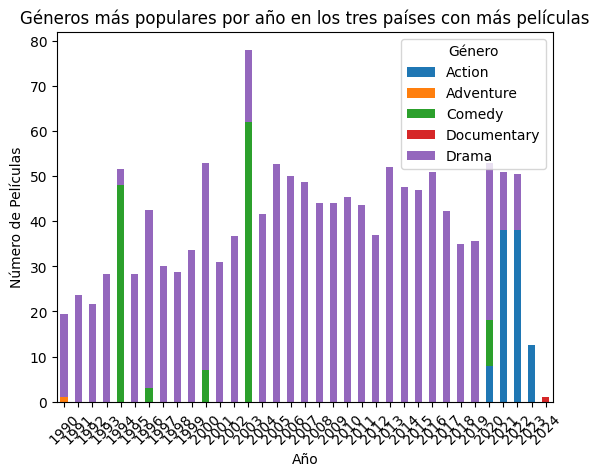

In [151]:
# Función para encontrar los géneros más vistos por país y por año
def géneros_más_vistos(df, country):
    df_country = df[df['production_countries'] == country]
    grouped = df_country.groupby(['startYear', 'genre']).size().reset_index(name='counts')
    most_popular_genres = grouped.loc[grouped.groupby('startYear')['counts'].idxmax()]
    return most_popular_genres

# Determinar los tres países con más películas
top_countries = df['production_countries'].value_counts().nlargest(3).index

# Aplicar la función para cada país y concatenar los resultados
result_list = [géneros_más_vistos(df, country) for country in top_countries]
result = pd.concat(result_list, keys=top_countries)

# Filtrar para incluir solo las películas lanzadas entre 1990 y 2025
result = result[(result['startYear'] >= 1990) & (result['startYear'] < 2025)]

# Pivotar el DataFrame para que cada país sea una columna y cada género una fila
pivot_table = result.pivot_table(index='startYear', columns='genre', values='counts', fill_value=0)

# Graficar
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Géneros más populares por año en los tres países con más películas')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.legend(title='Género')
plt.xticks(rotation=45)
plt.show()


<Figure size 1400x800 with 0 Axes>

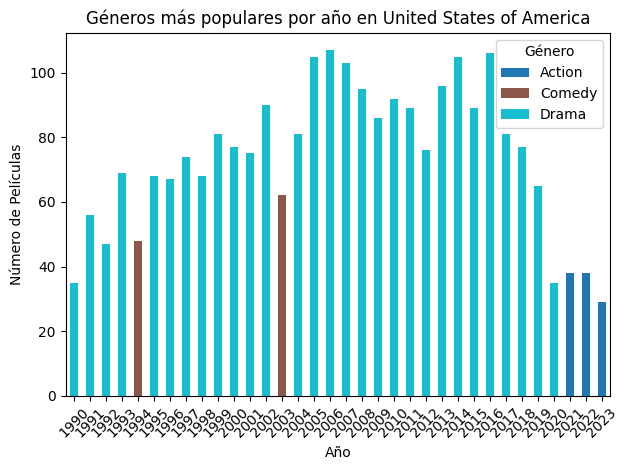

<Figure size 1400x800 with 0 Axes>

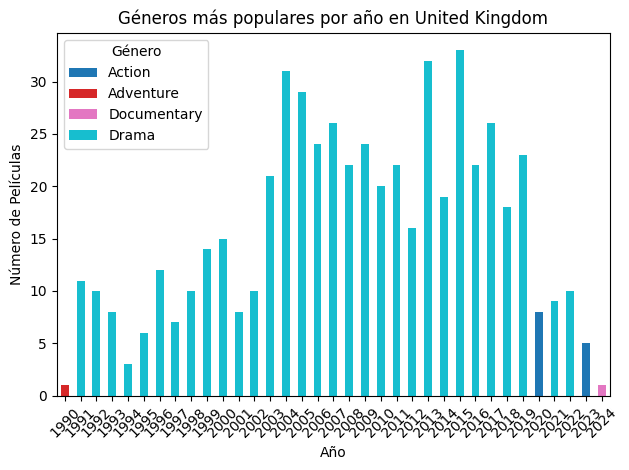

<Figure size 1400x800 with 0 Axes>

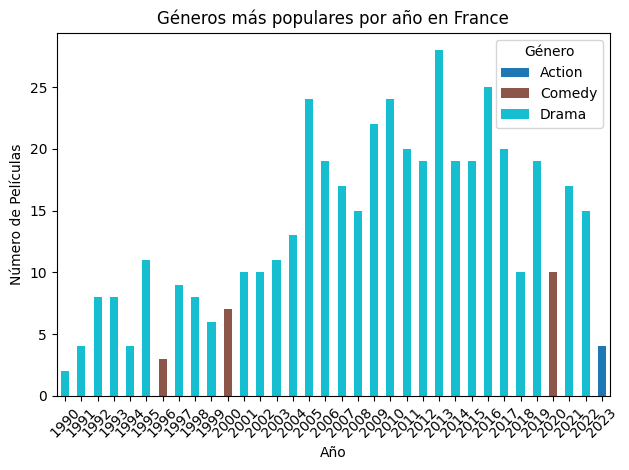

In [152]:
def géneros_más_vistos(df, country):
    df_country = df[df['production_countries'] == country]
    grouped = df_country.groupby(['startYear', 'genre']).size().reset_index(name='counts')
    most_popular_genres = grouped.loc[grouped.groupby('startYear')['counts'].idxmax()]
    return most_popular_genres

# Determinar los tres países con más películas
top_countries = df['production_countries'].value_counts().nlargest(3).index

# Aplicar la función para cada país
results = {country: géneros_más_vistos(df, country) for country in top_countries}

# Filtrar para incluir solo las películas lanzadas entre 1990 y 2025
for country, result in results.items():
    results[country] = result[(result['startYear'] >= 1990) & (result['startYear'] < 2025)]

# Graficar para cada país
for country, result in results.items():
    plt.figure(figsize=(14, 8))
    pivot_table = result.pivot_table(index='startYear', columns='genre', values='counts', fill_value=0)
    pivot_table.plot(kind='bar', stacked=True, colormap='tab10')
    plt.title(f'Géneros más populares por año en {country}')
    plt.xlabel('Año')
    plt.ylabel('Número de Películas')
    plt.xticks(rotation=45)
    plt.legend(title='Género')
    plt.tight_layout()
    plt.show()


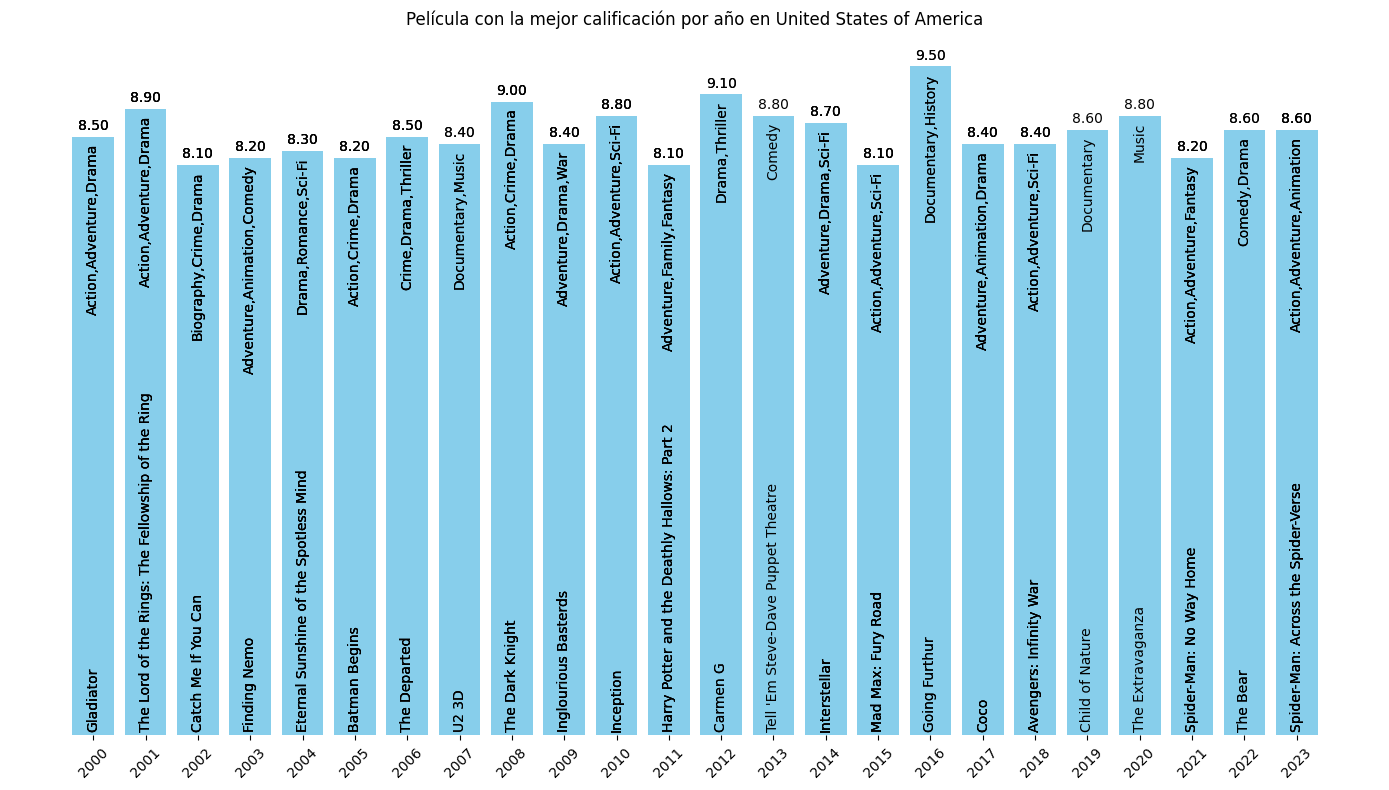

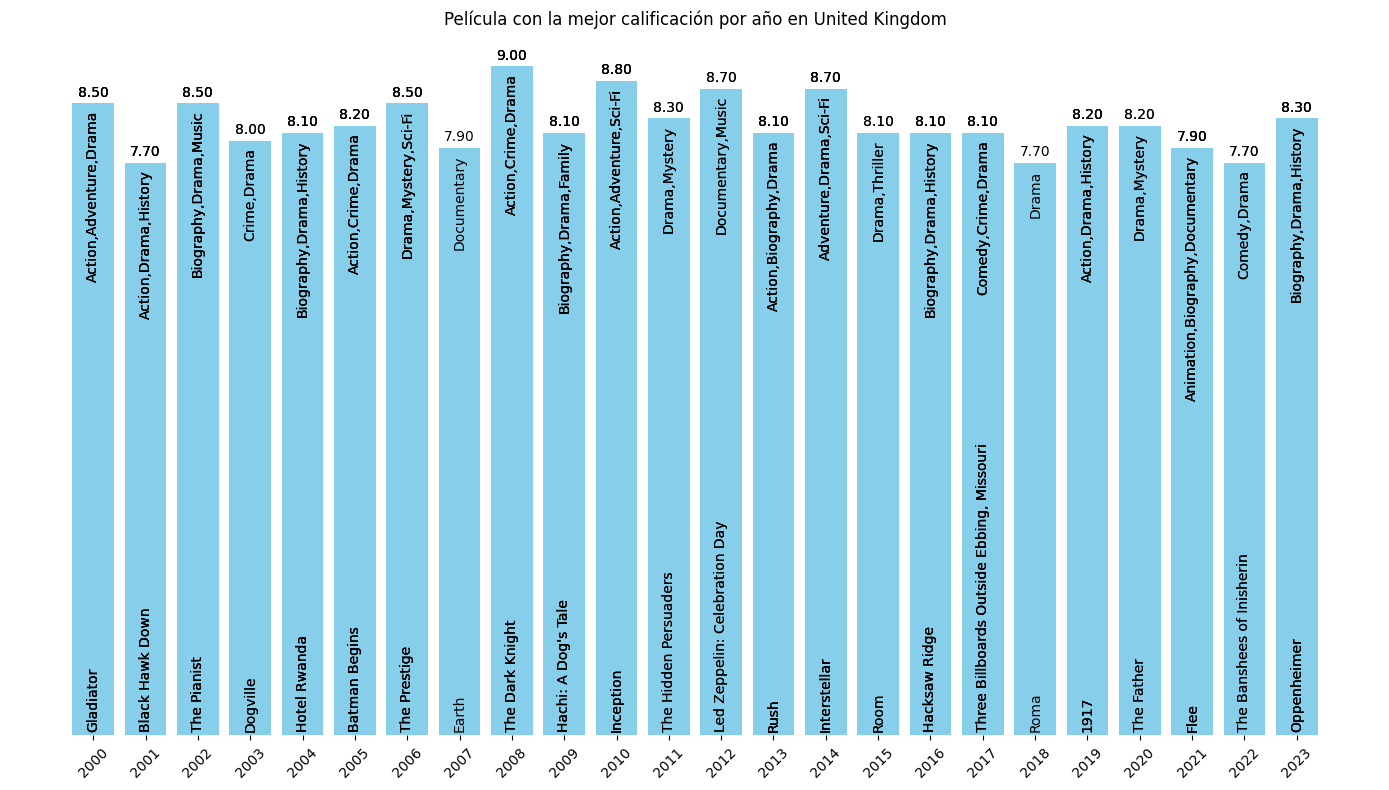

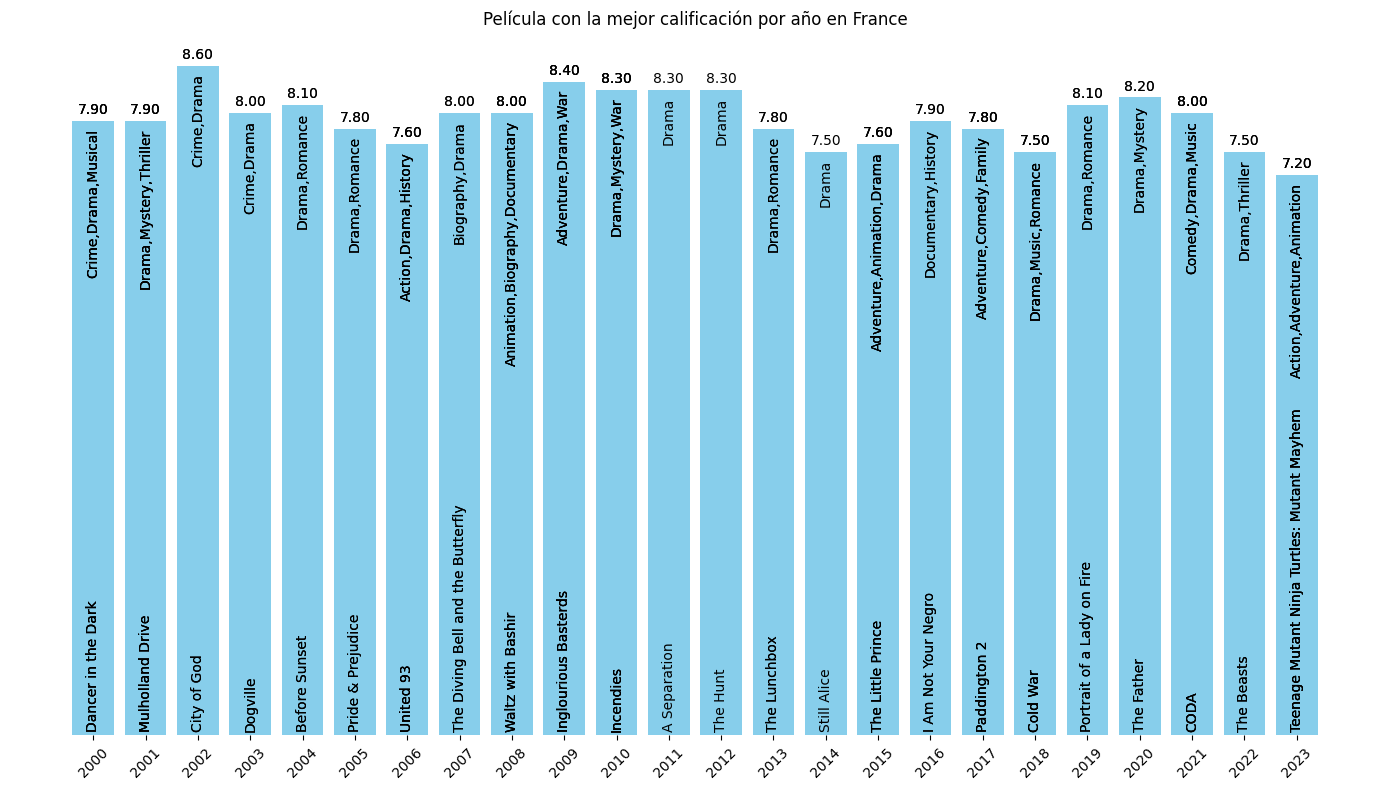

In [203]:
def películas_con_mejor_rating(df, country):
    df_country = df[df['production_countries'] == country]
    # Agrupar por año y seleccionar la película con la mayor calificación promedio en ese año
    best_rated = df_country.loc[df_country.groupby('startYear')['averageRating'].idxmax()]
    return best_rated[['startYear', 'primaryTitle', 'averageRating','genres_x']]

# Determinar los tres países con más películas
top_countries = df['production_countries'].value_counts().nlargest(3).index

# Aplicar la función para cada país
results = {country: películas_con_mejor_rating(df, country) for country in top_countries}

# Filtrar para incluir solo las películas lanzadas entre 1990 y 2025
for country, result in results.items():
    results[country] = result[(result['startYear'] >= 2000) & (result['startYear'] < 2024)]

# Graficar para cada país
for country, result in results.items():
    plt.figure(figsize=(14, 8))
    # Ordenar por año para una visualización más lógica
    result = result.sort_values('startYear')
    bars = plt.bar(result['startYear'].astype(str), result['averageRating'], color='skyblue')
    plt.title(f'Película con la mejor calificación por año en {country}')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45)
    plt.yticks([])
    plt.tight_layout()
    plt.box(on=False)
    plt.grid(False)

    # Agregar texto para el nombre de la película y la calificación en cada barra
    for bar, title, rating, genre in zip(bars, result['primaryTitle'], result['averageRating'],result['genres_x'] ):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{rating:.2f}', ha='center', va='bottom')
        plt.text(bar.get_x() + bar.get_width() / 2, 0.05, f'{title}', ha='center', va='bottom',rotation=90)
        plt.text(bar.get_x() + bar.get_width() / 2, yval - 0.1, f'{genre}', ha='center', va='top',rotation=90)

    plt.show()


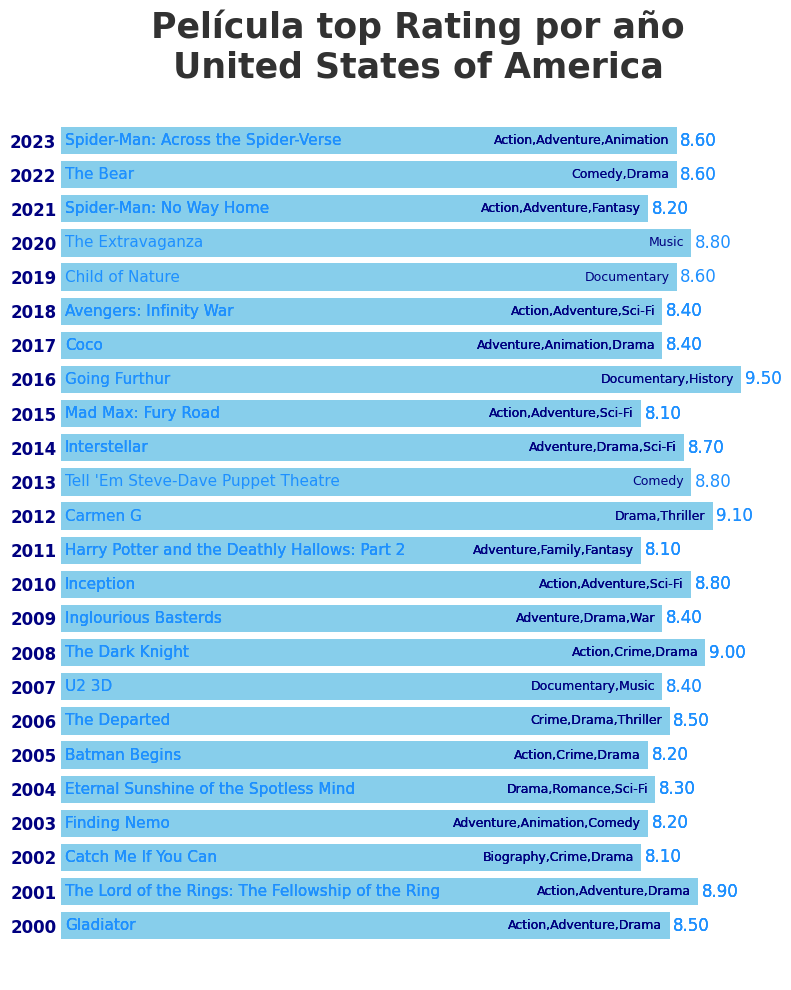

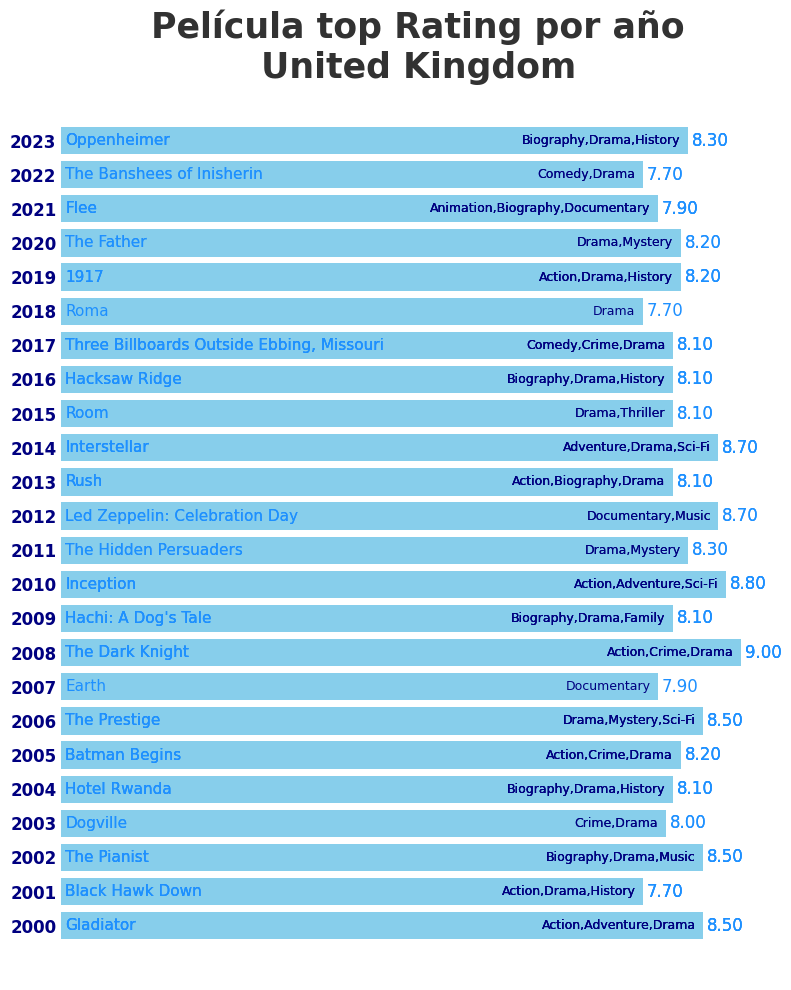

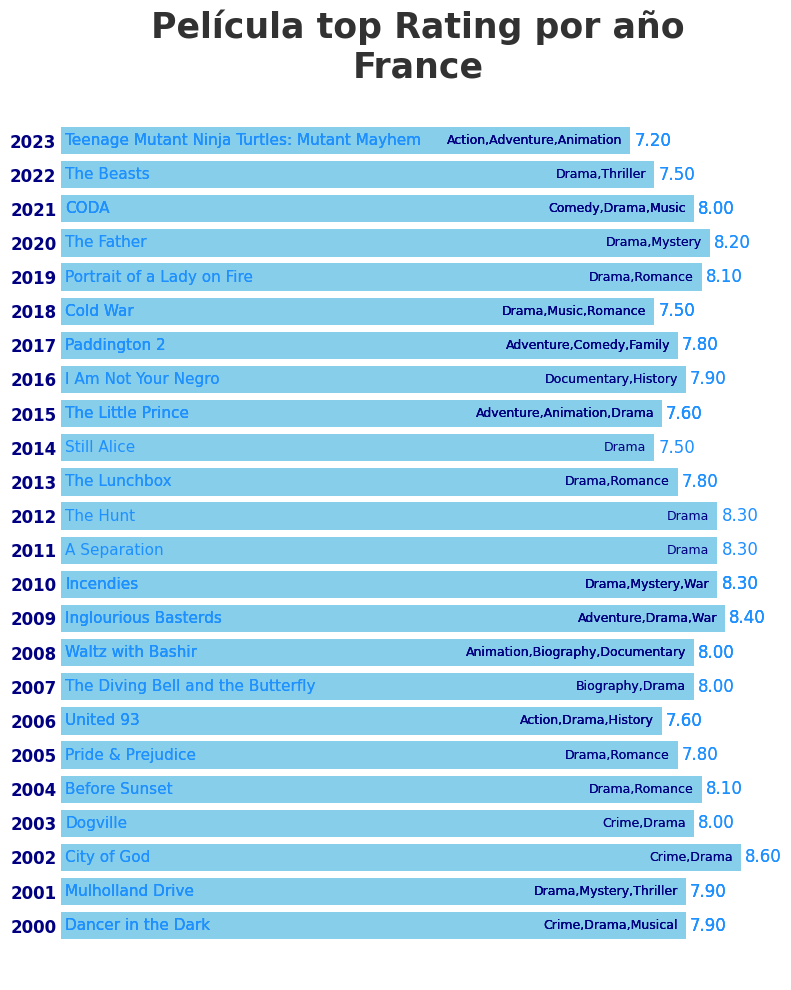

In [207]:
for country, result in results.items():
    plt.figure(figsize=(8, 10),facecolor='none')
    result = result.sort_values('startYear')
    bars = plt.barh(result['startYear'].astype(str), result['averageRating'], color='skyblue')
    plt.title(f'Película top Rating por año\n{country}',fontsize=25,color='#323232',fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks(fontsize=12,color='navy',fontweight='bold')
    plt.tight_layout()
    plt.box(on=False)
    plt.grid(False)

    # Quitar los guiones de los yticks
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().tick_params(axis='y', length=0)


    # Agregar texto para el nombre de la película y la calificación en cada barra
    for bar, title, rating, genre in zip(bars, result['primaryTitle'], result['averageRating'],result['genres_x'] ):
        xval = bar.get_width()
        plt.text(xval + 0.05, bar.get_y() + bar.get_height() / 2, f'{rating:.2f}', ha='left', va='center',fontsize=12,color='dodgerblue')
        plt.text(0.05, bar.get_y() + bar.get_height() / 2, f'{title}', ha='left', va='center',fontsize=11,color='dodgerblue')
        plt.text(xval - 0.1, bar.get_y() + bar.get_height() / 2, f'{genre}', ha='right', va='center',rotation=0,fontsize=9,color='navy')
    plt.savefig(f'/content/drive/MyDrive/Bootcamp-Alejo-projects/Movie_Analysis/graficas/película_top_Rating_x_año_{country}.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
